In [19]:
import mesh2sdf
import trimesh

filename = '../model/dragon.obj'
mesh = trimesh.load(filename, force='mesh')

In [20]:
mesh.is_watertight

False

In [32]:
mesh.vertices[:,0]+=0.3
mesh.vertices[:,0]

TrackedArray([-0.01348723, -0.0125    , -0.0125    , ...,  0.61788898,
               0.61794059,  0.6206718 ])

In [21]:
size = 128#sdf's shape is (size,size,size)
level = 2 / size

In [4]:
# mesh_scale = 0.8
# vertices=mesh.vertices
# bbmax=vertices.max(0)
# bbmin=vertices.min(0)
# center=(bbmin+bbmax)*0.5
# print((bbmax - bbmin).max())

# scale = 2.0 * mesh_scale / (bbmax - bbmin).max()

# vertices = (vertices - center) * scale

In [22]:
# fix mesh
import time
vertices=mesh.vertices*0.5
t0 = time.time()
sdf, mesh = mesh2sdf.compute(vertices, mesh.faces, size, fix=True, level=level, return_mesh=True)
t1 = time.time()

In [23]:
# output
import numpy as np
# mesh.vertices = mesh.vertices / scale + center
# mesh.export(filename[:-4] + '.fixed.obj')
# np.save(filename[:-4] + '.npy', sdf)
print('It takes %.4f seconds to process %s' % (t1-t0, filename))

It takes 13.0613 seconds to process ../model/dragon.obj


### Visualize SDF

In [24]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import skimage.measure

In [25]:
# sdf = np.load('../model/bunny.npy')
print(sdf.shape)
size = sdf.shape[0]
print(sdf.max(), sdf.min())

(128, 128, 128)
1.5674202 -0.08209858


In [ ]:
# #Not necessary, used for debug.
# mesh_scale = 0.8
# levels = [-0.02, 0.0, 0.02]
# # extract level sets
# for i, level in enumerate(levels):
#   vtx, faces, _, _ = skimage.measure.marching_cubes(sdf, level)

#   vtx = vtx * (mesh_scale * 2.0 / size) - 1.0
#   mesh = trimesh.Trimesh(vtx, faces)
#   mesh.export(os.path.join('./', 'l%.2f.obj' % level))

/var/folders/xx/_tbm46kx44581jh_7wh67hl00000gp/T/ipykernel_32899/3810887940.py:17: UserWarning: No contour levels were found within the data range.
  ax.contour(sample, levels=[0], colors='k', linewidths=0.3)
/var/folders/xx/_tbm46kx44581jh_7wh67hl00000gp/T/ipykernel_32899/3810887940.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(2.75, 2.75), dpi=300)


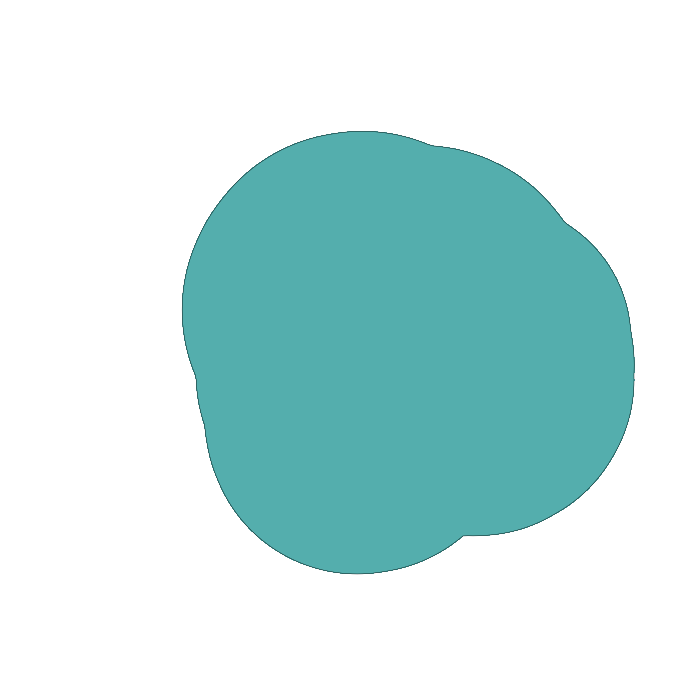

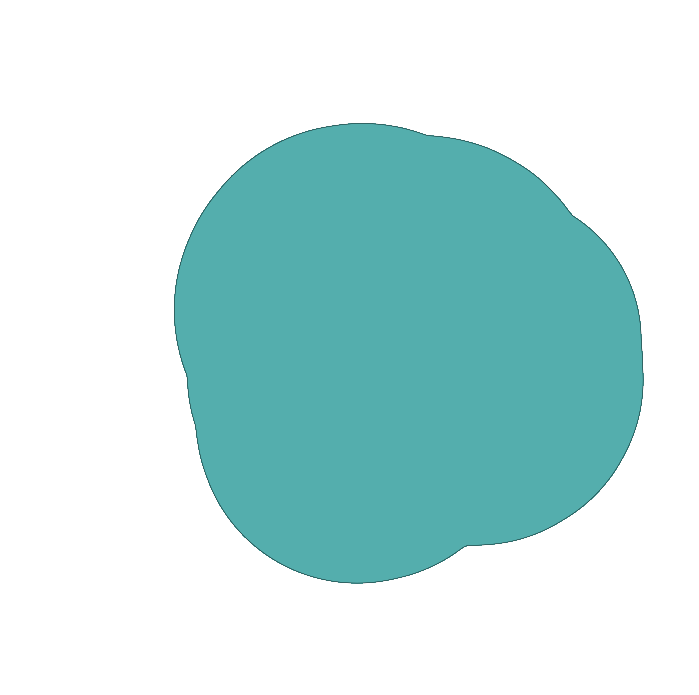

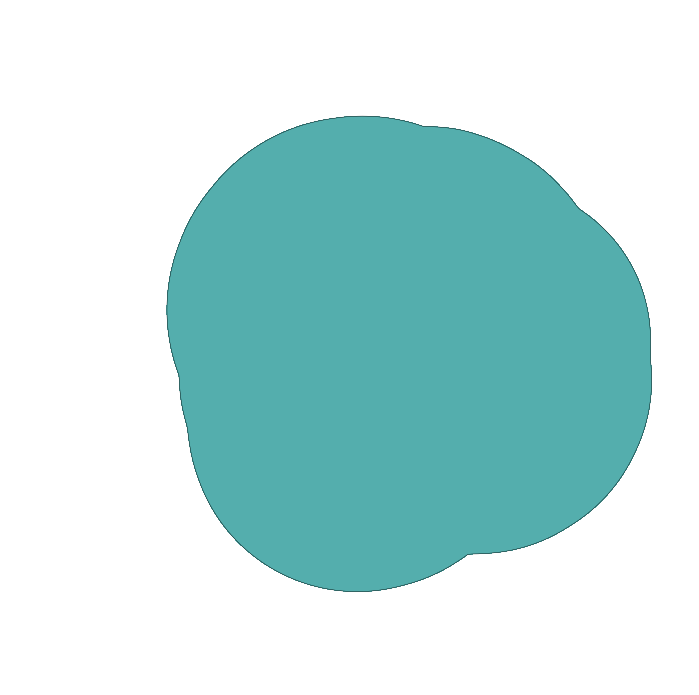

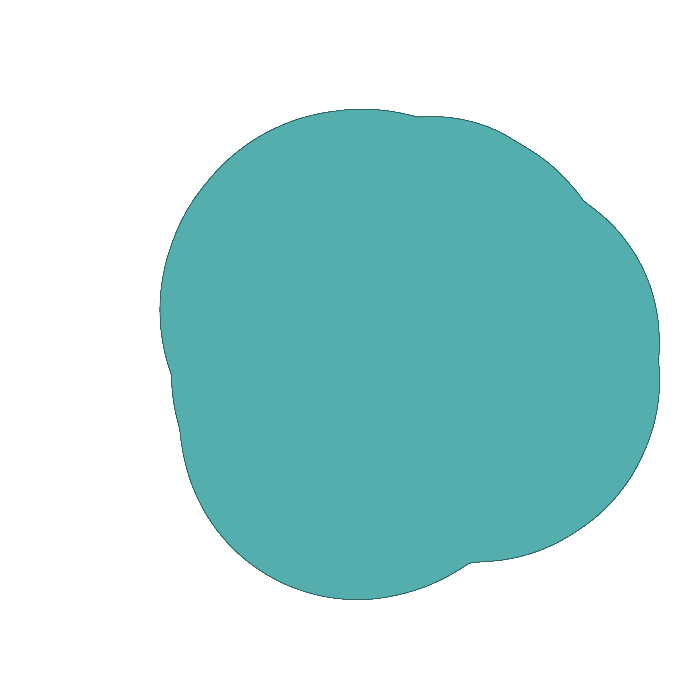

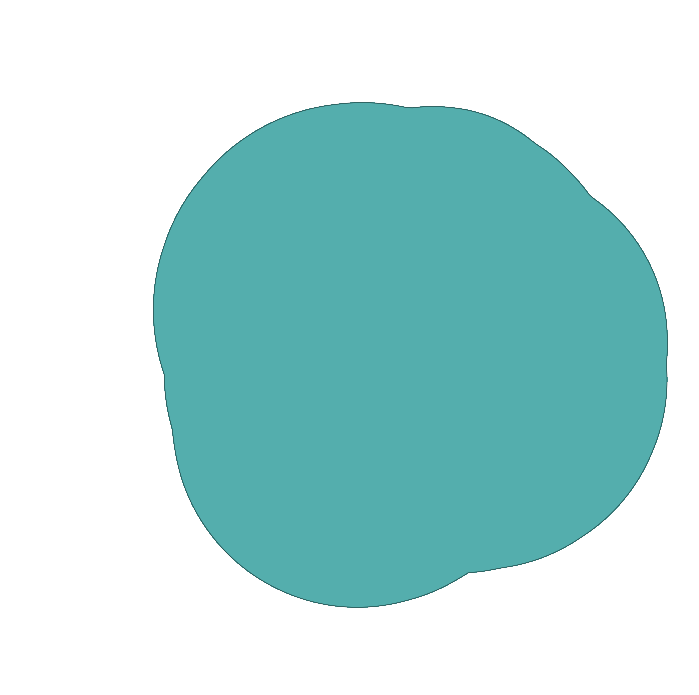

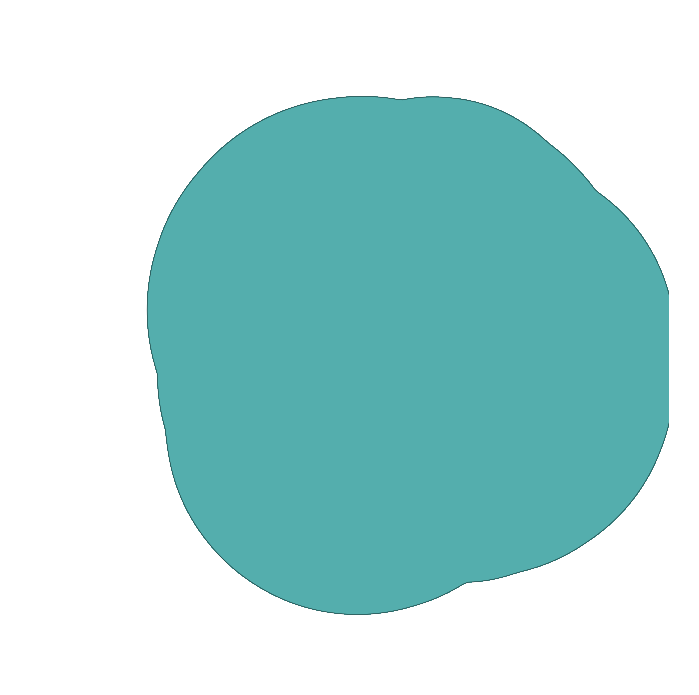

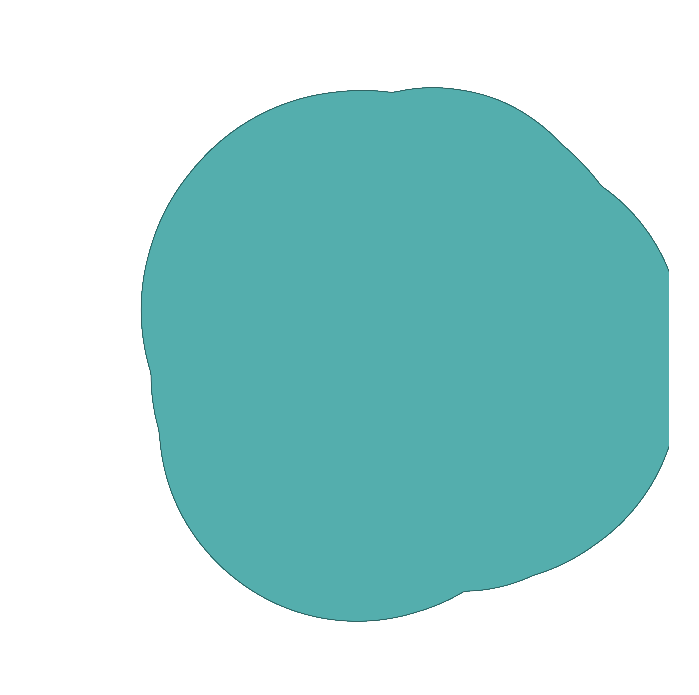

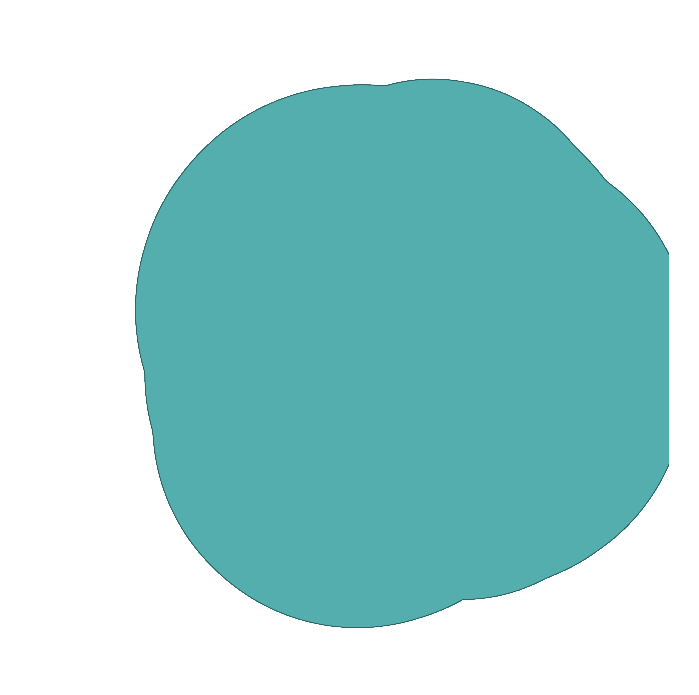

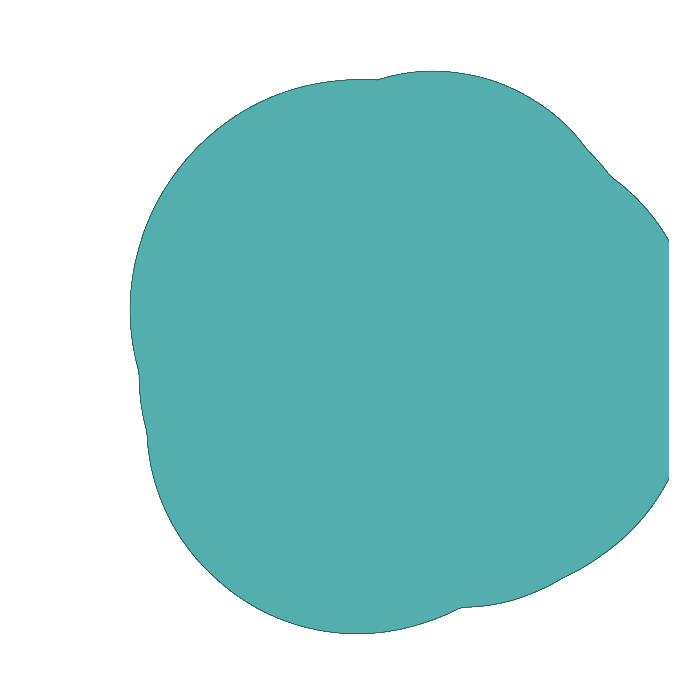

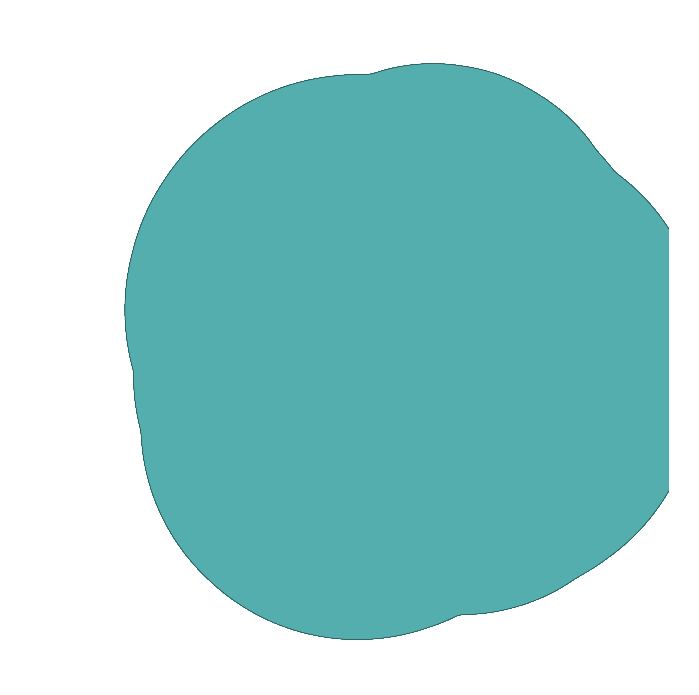

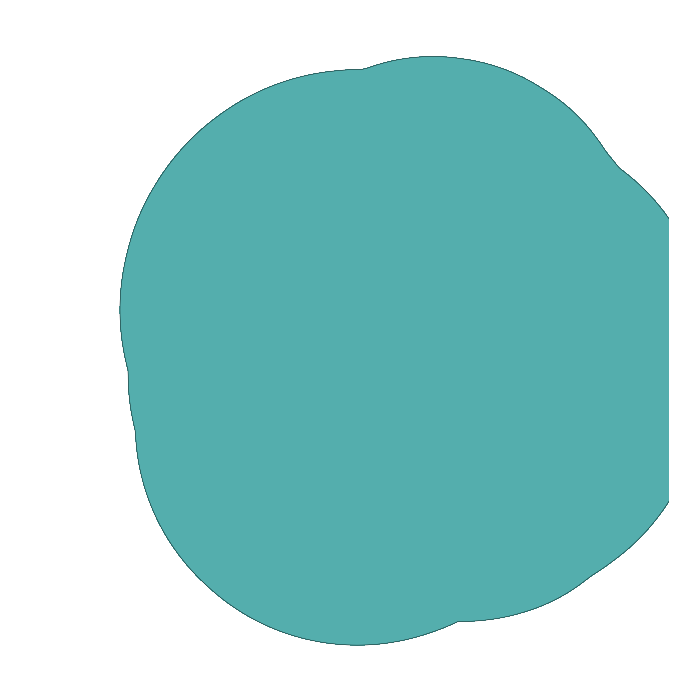

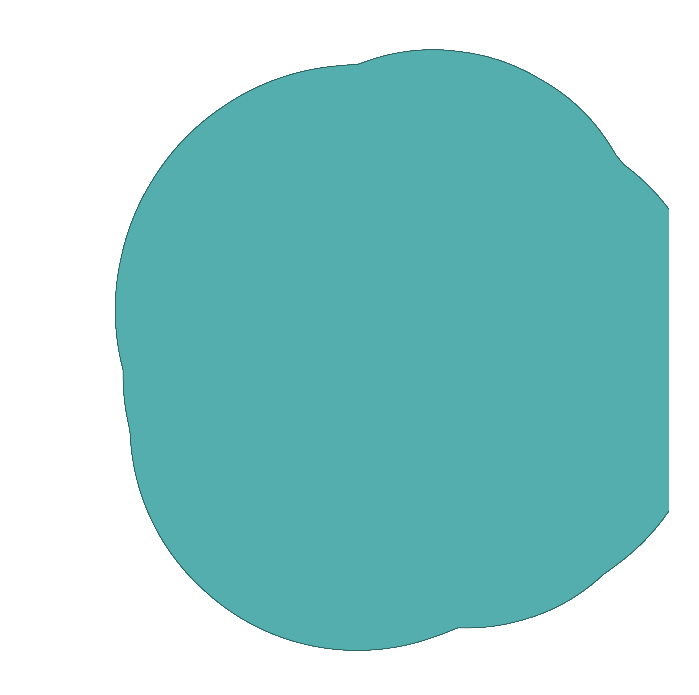

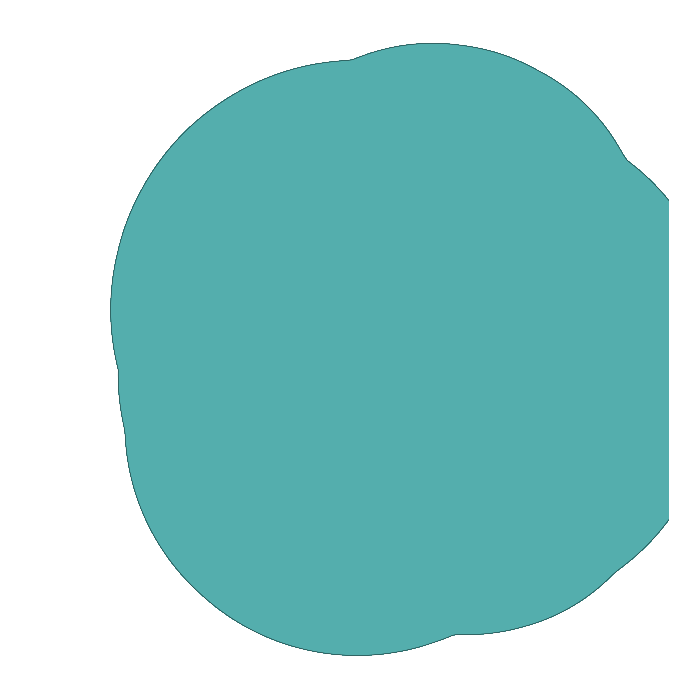

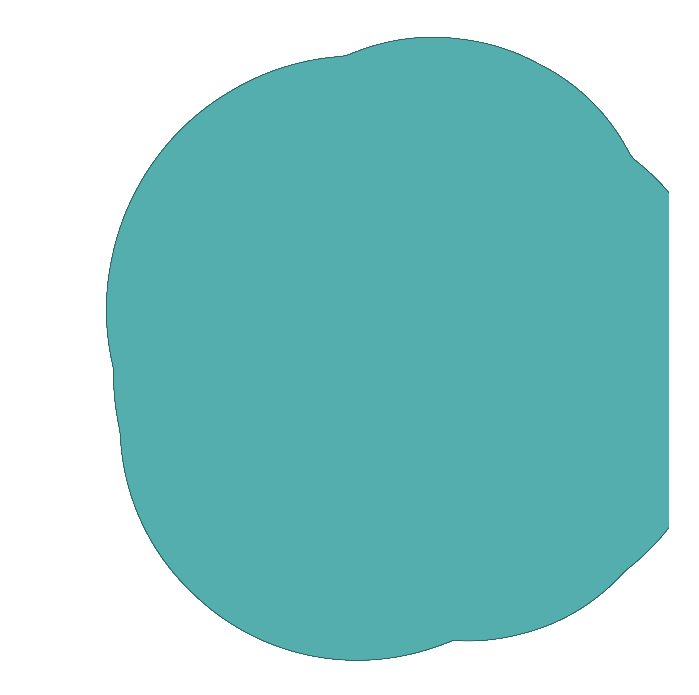

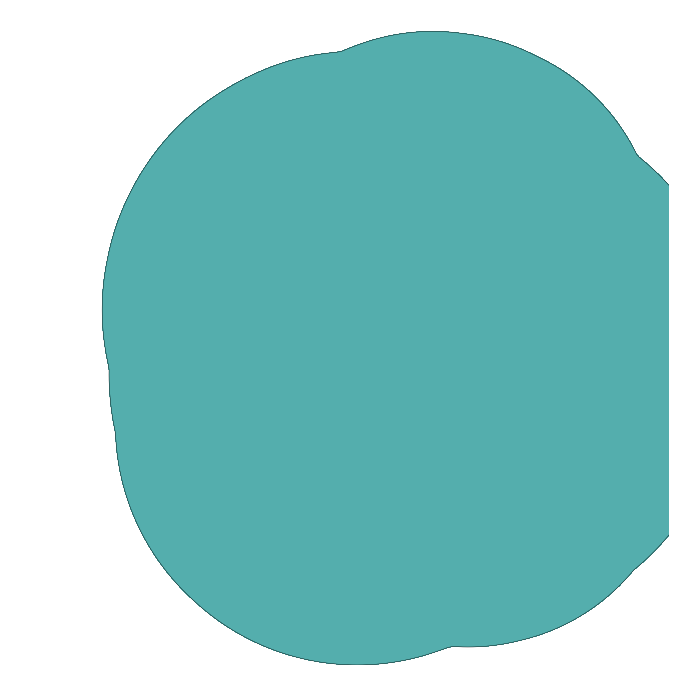

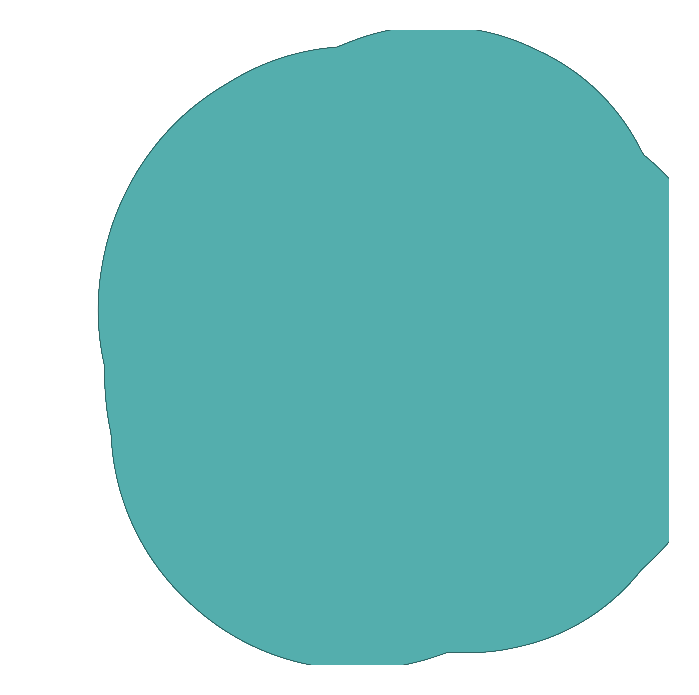

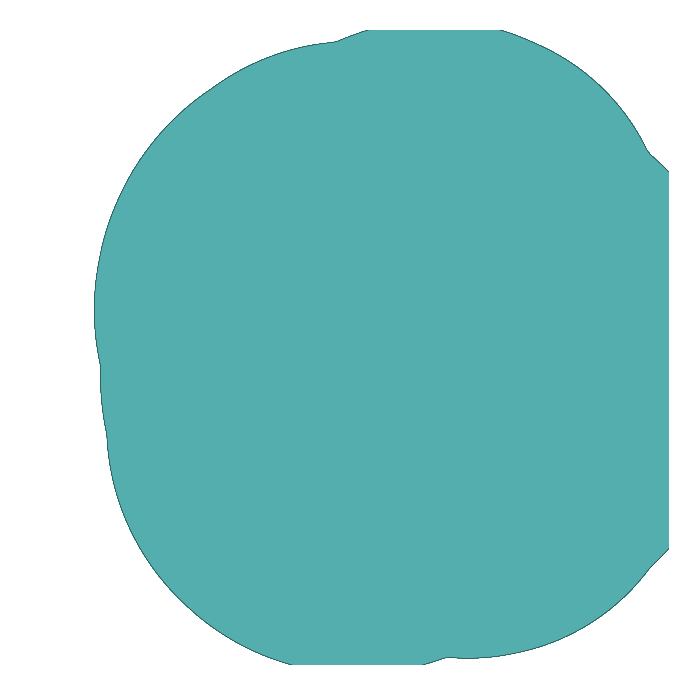

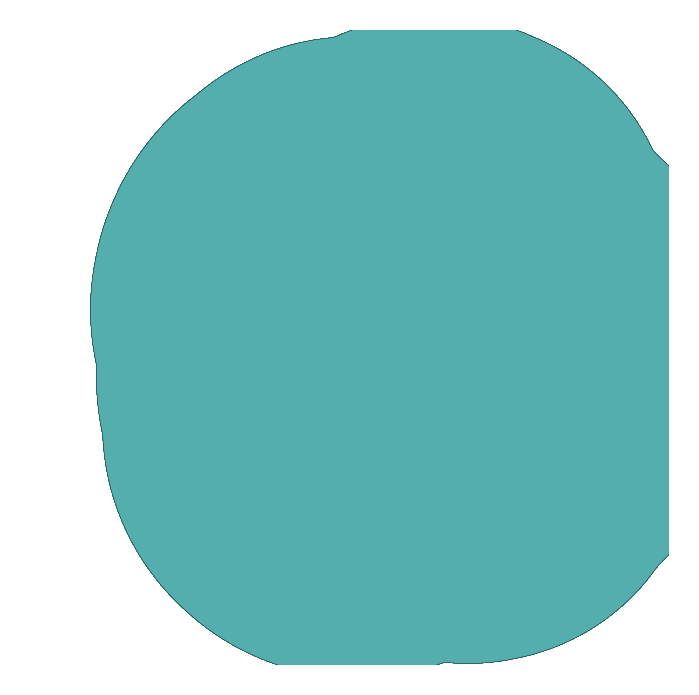

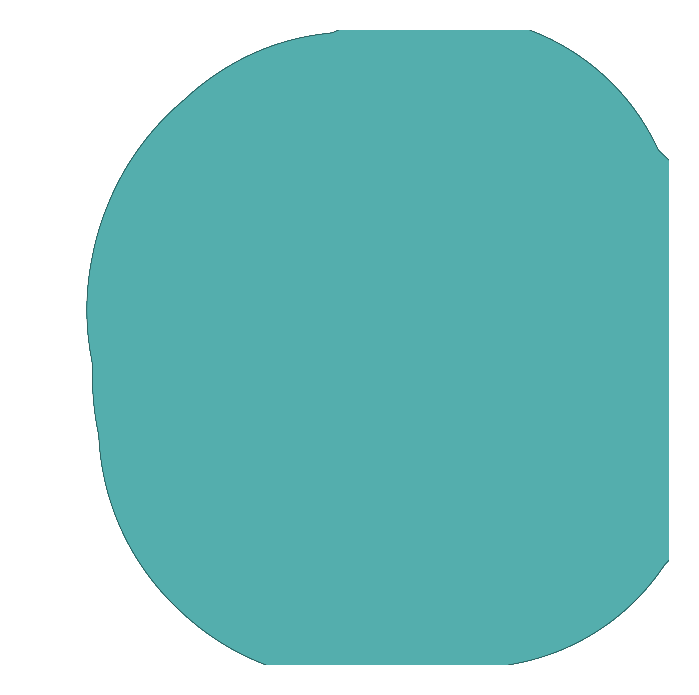

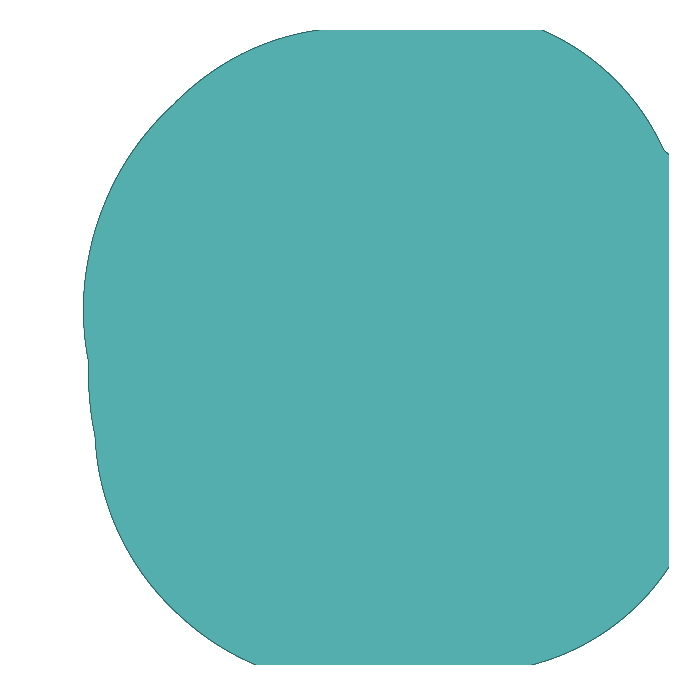

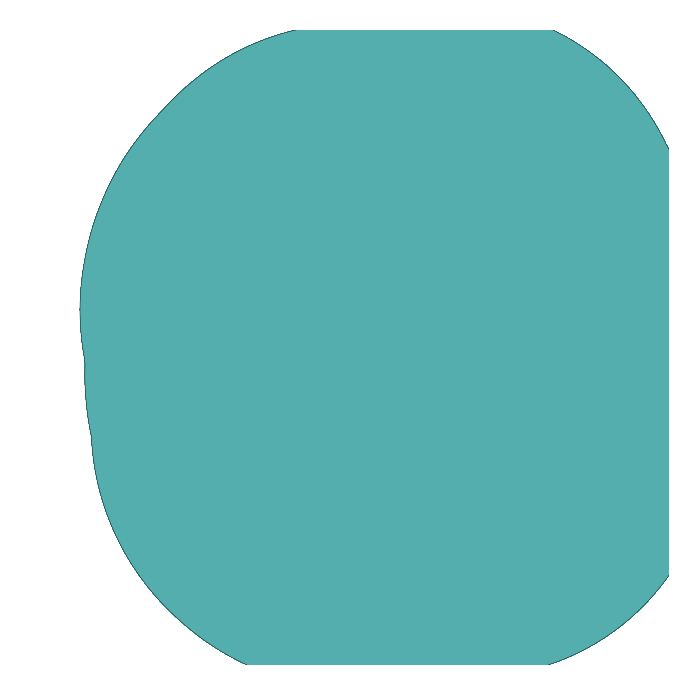

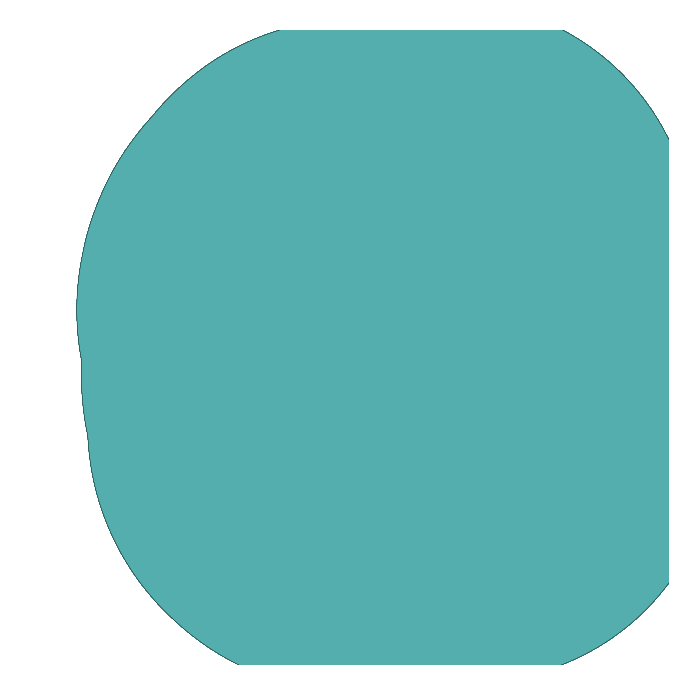

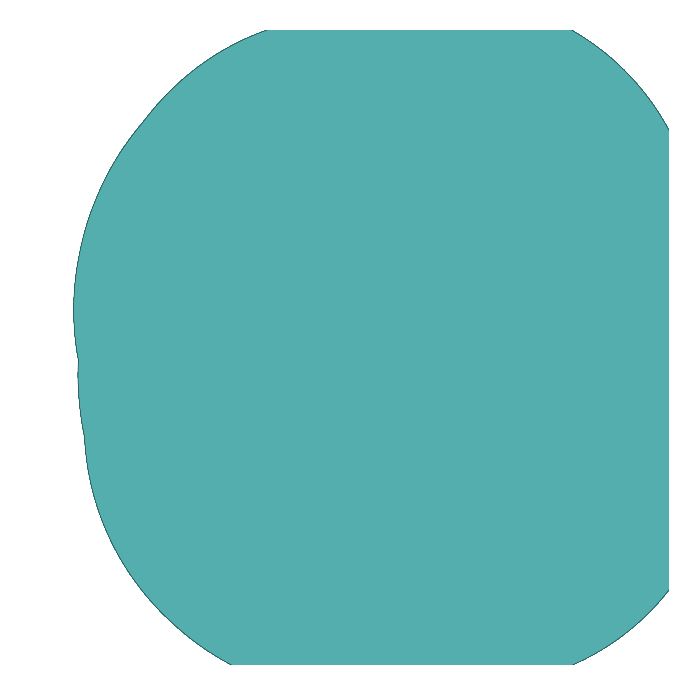

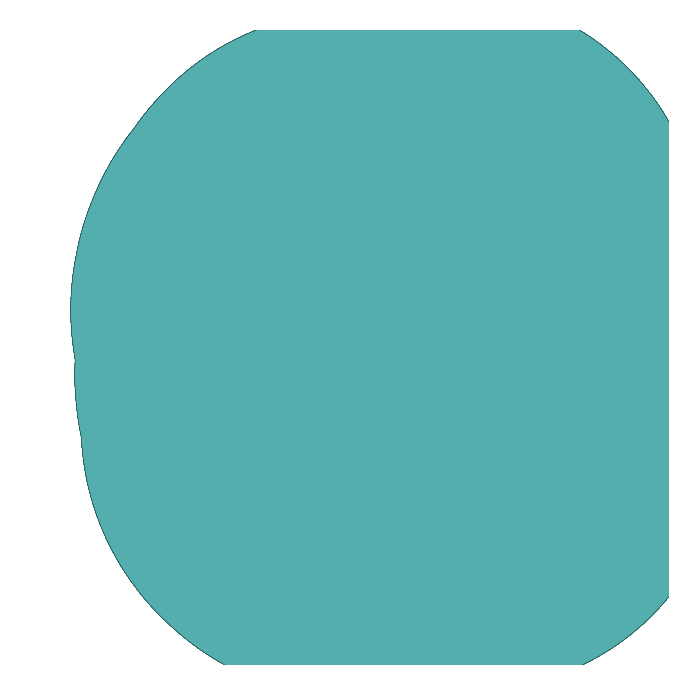

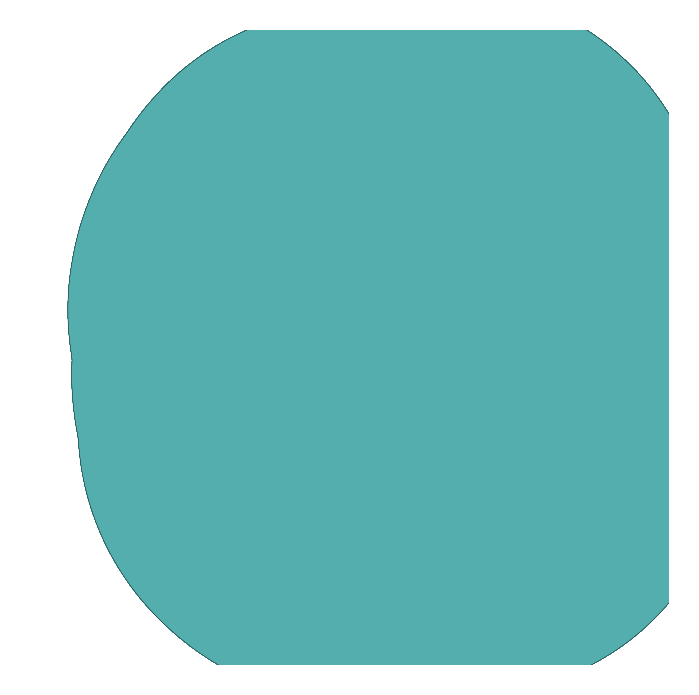

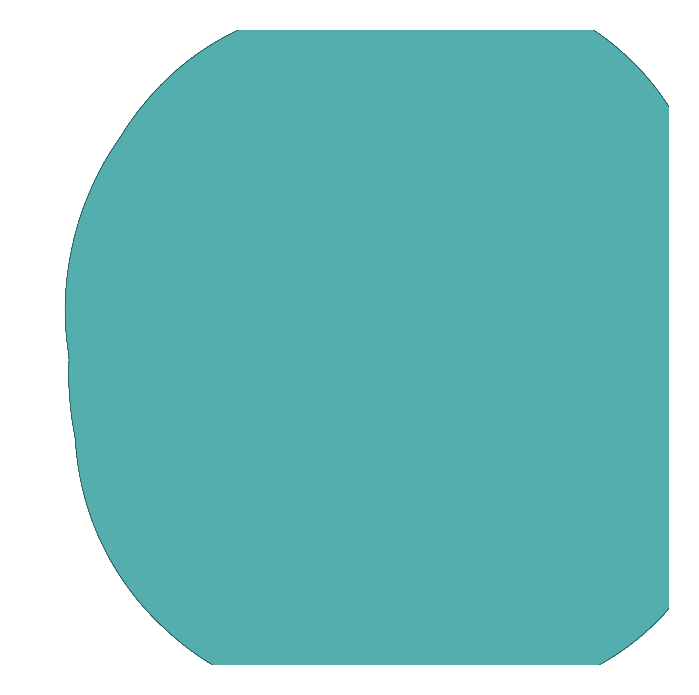

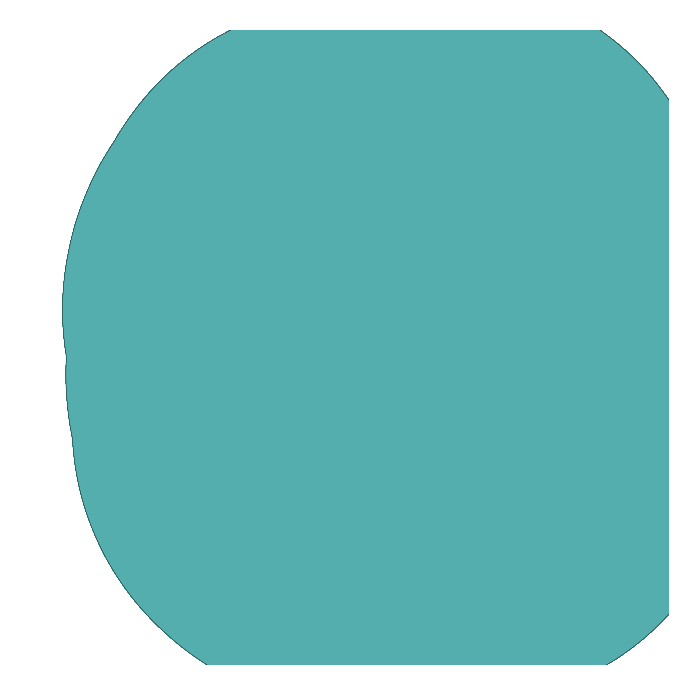

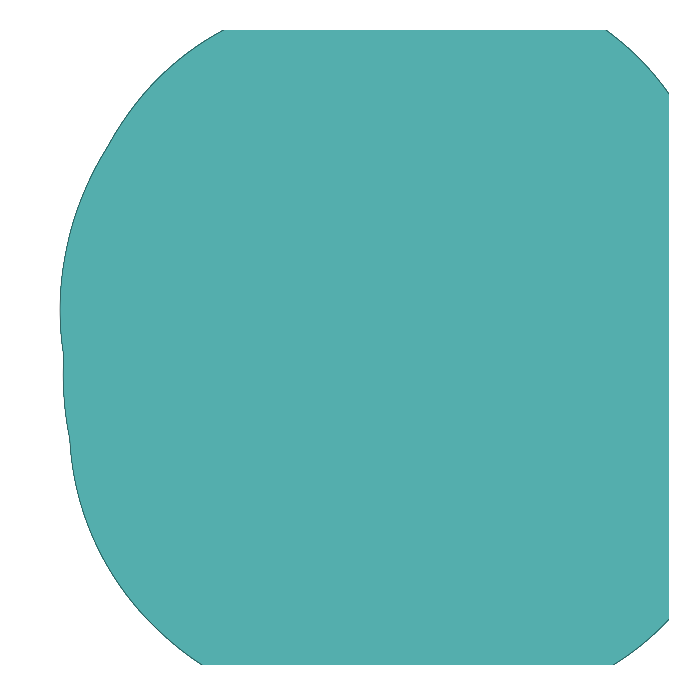

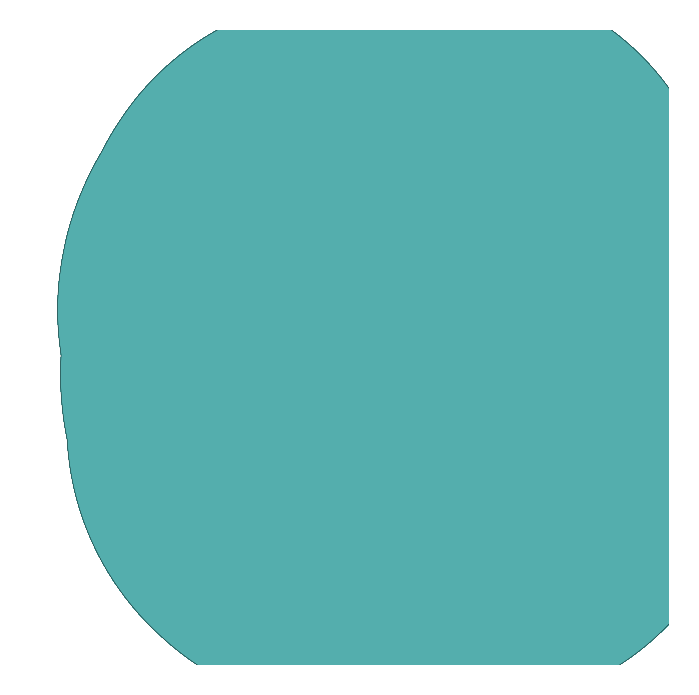

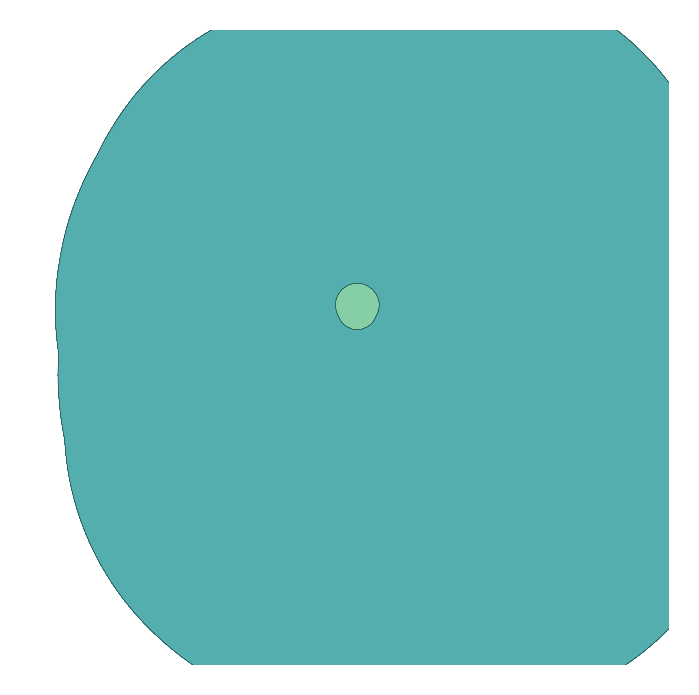

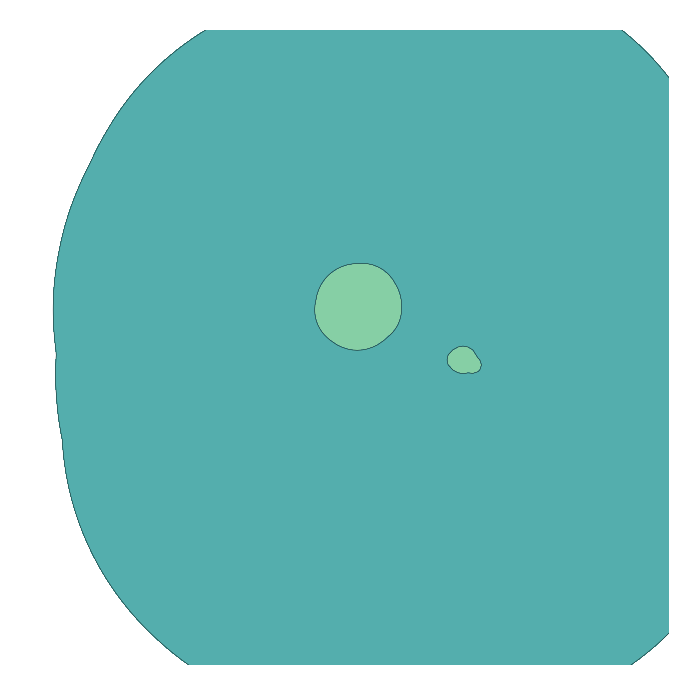

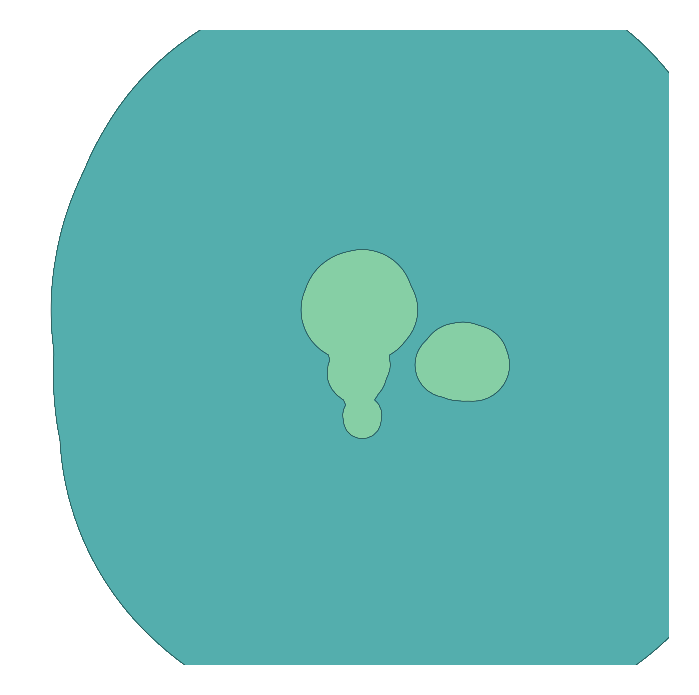

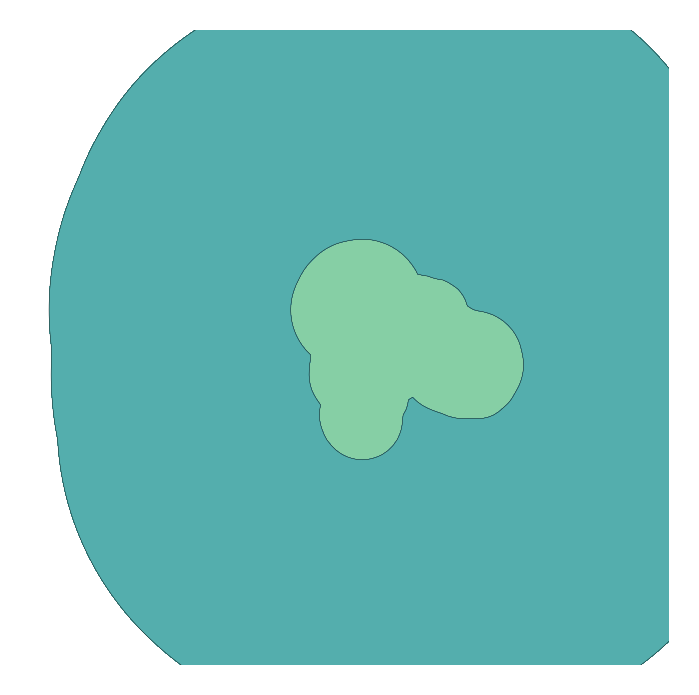

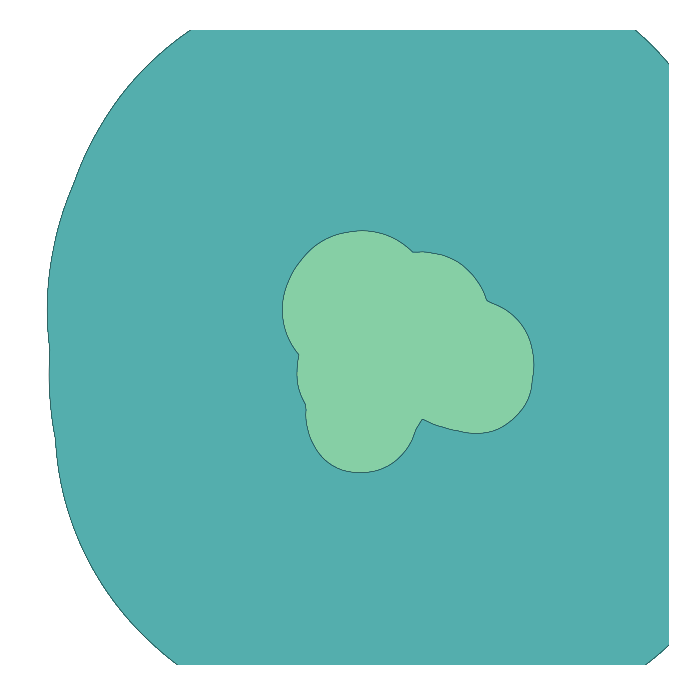

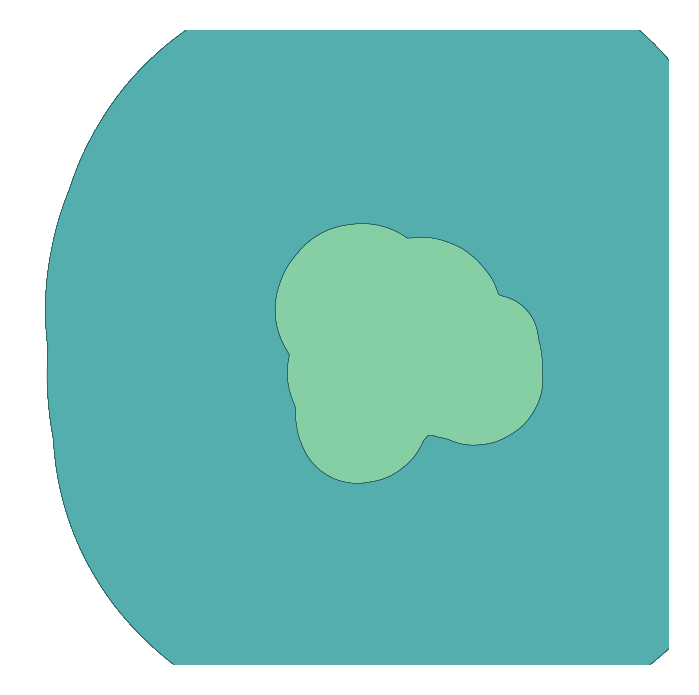

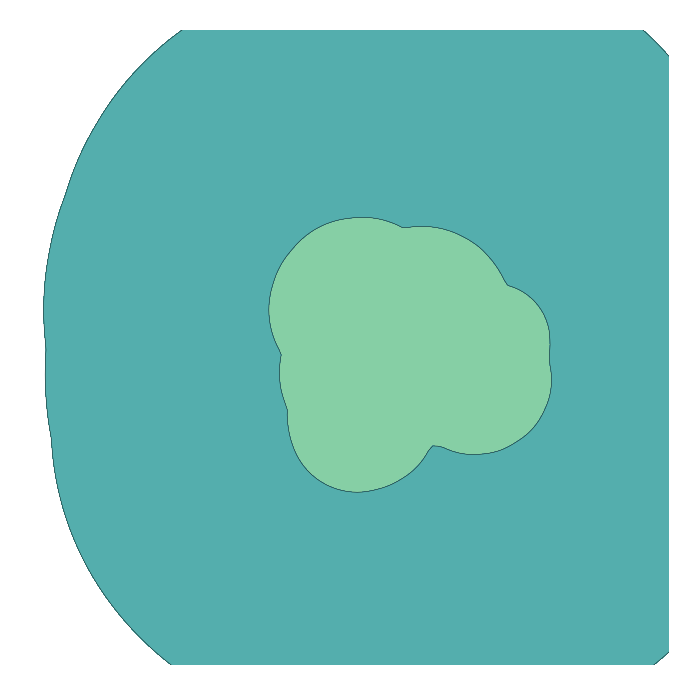

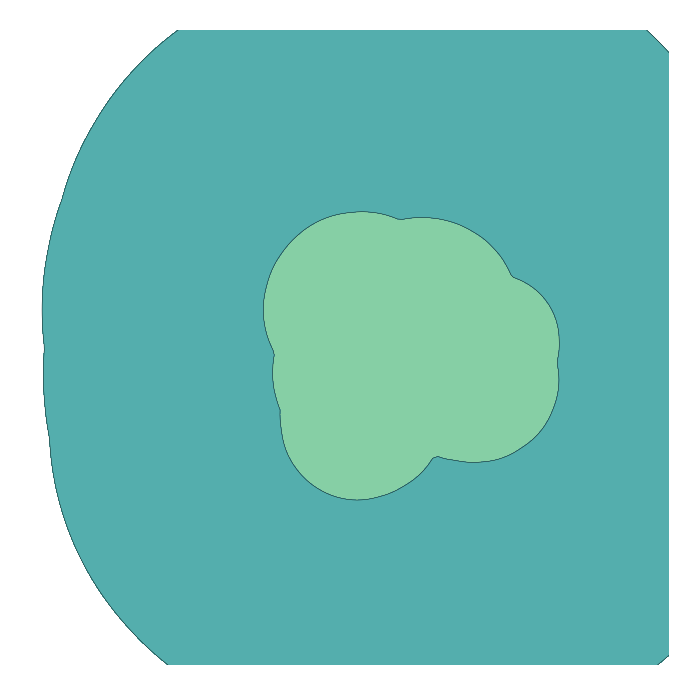

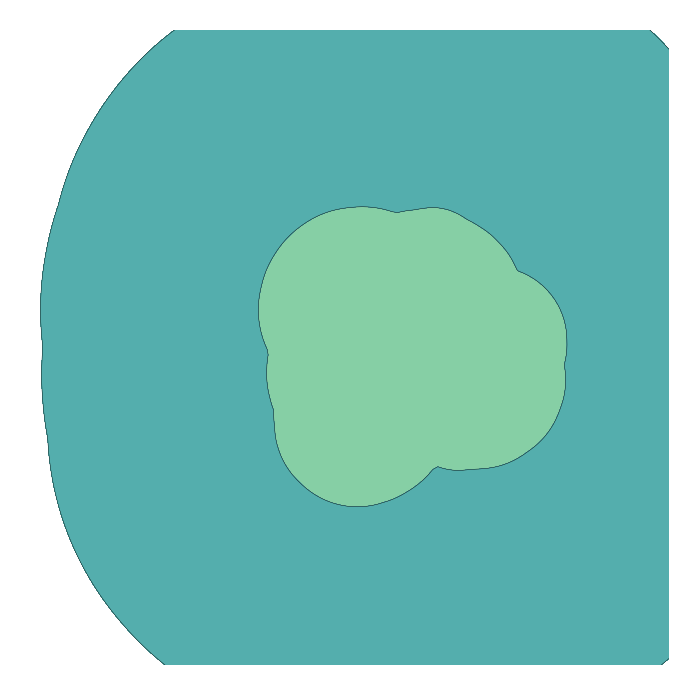

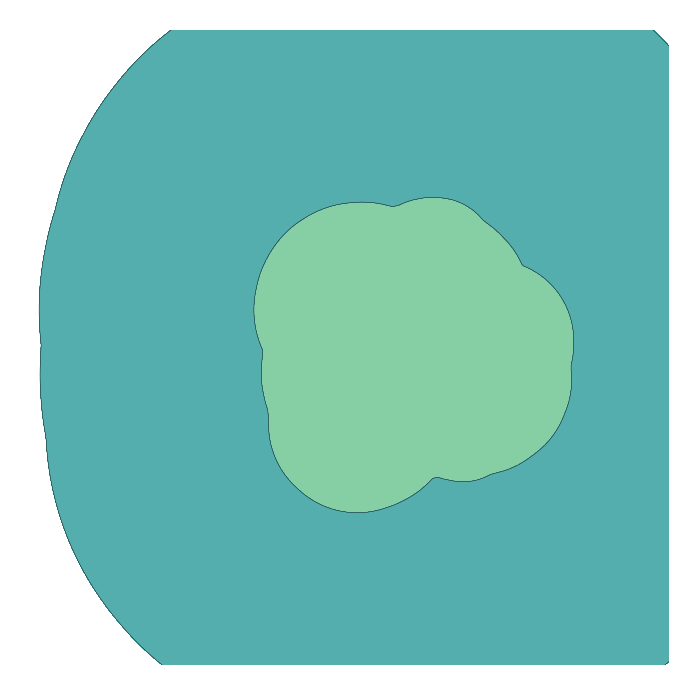

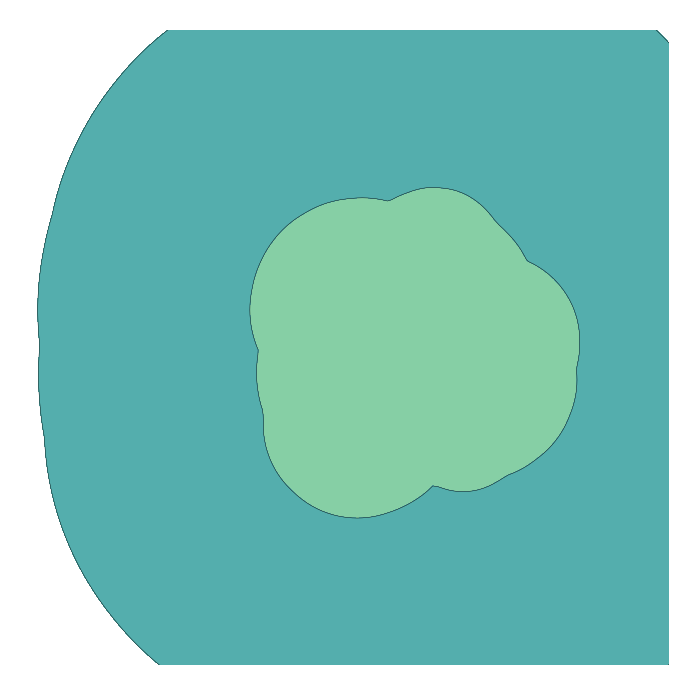

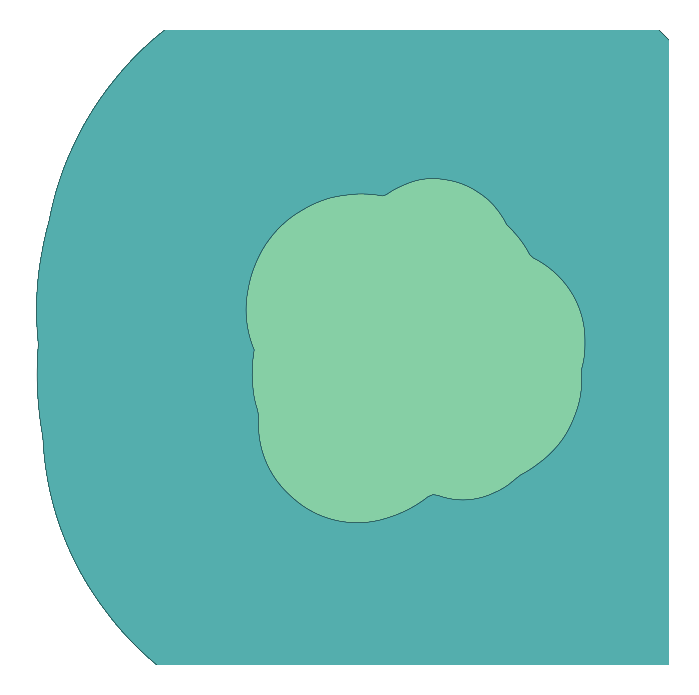

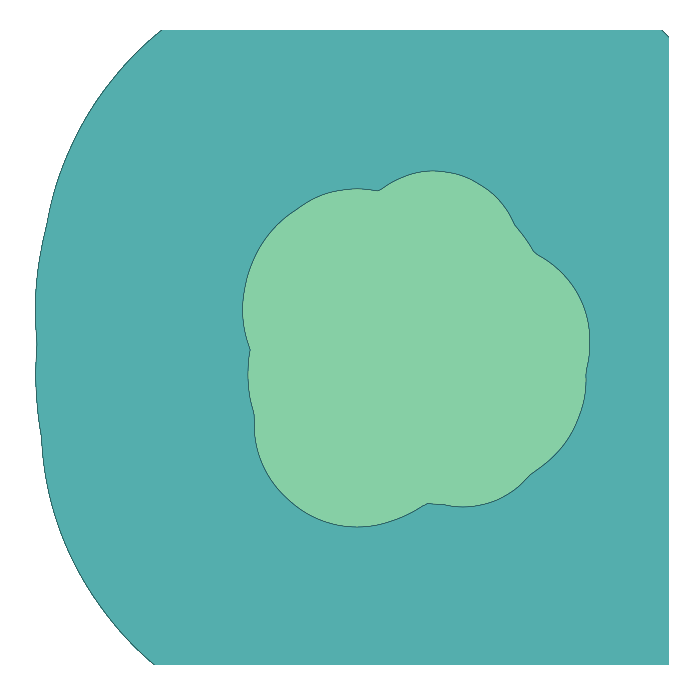

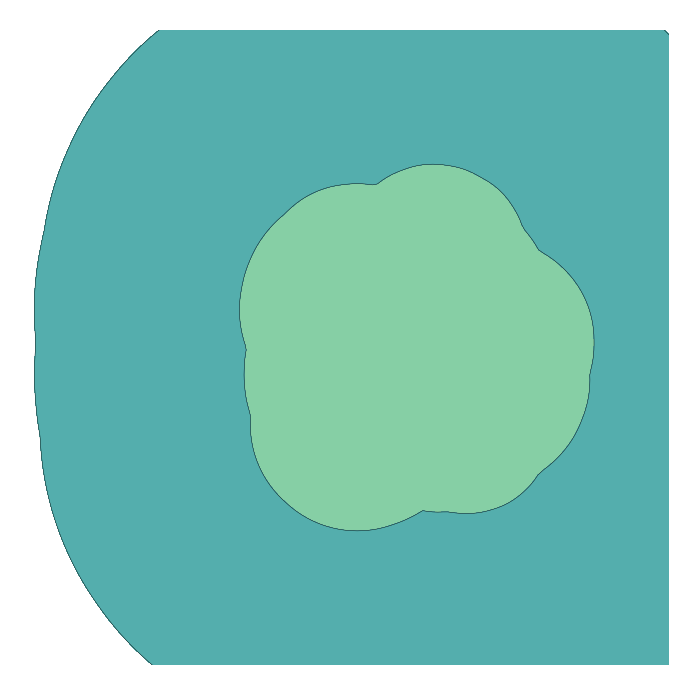

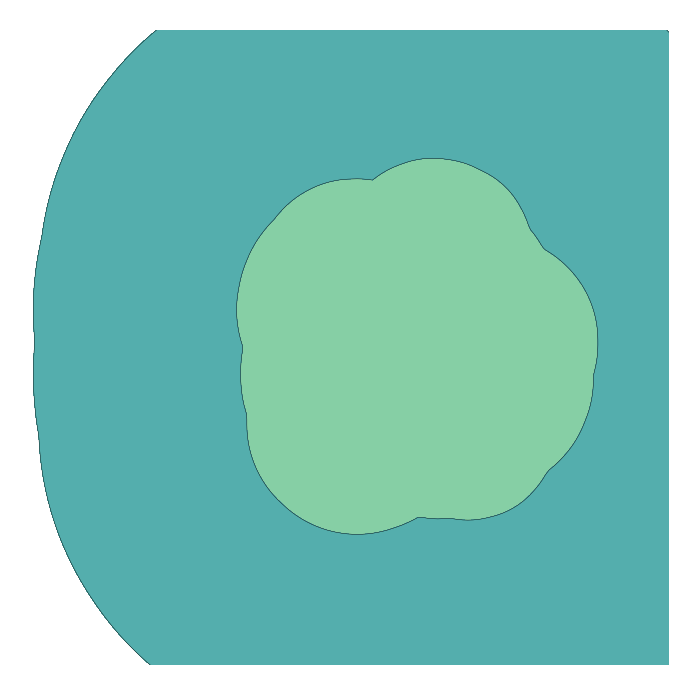

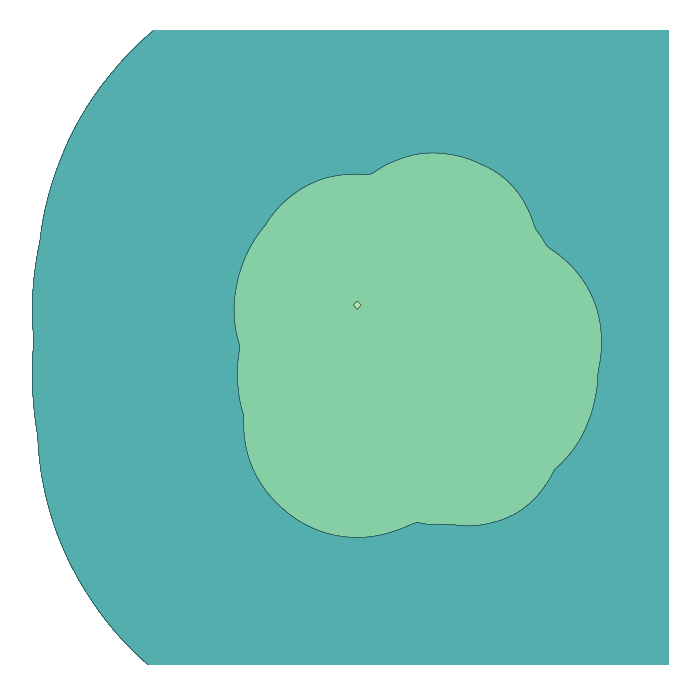

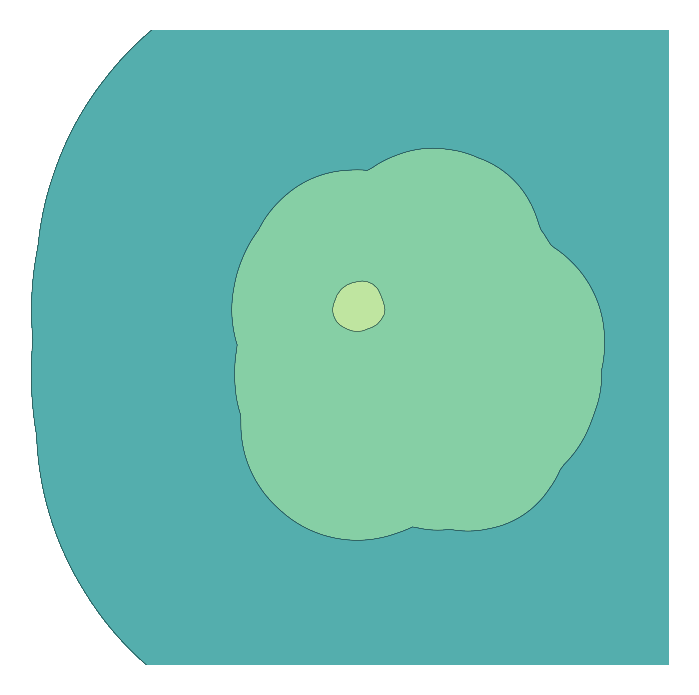

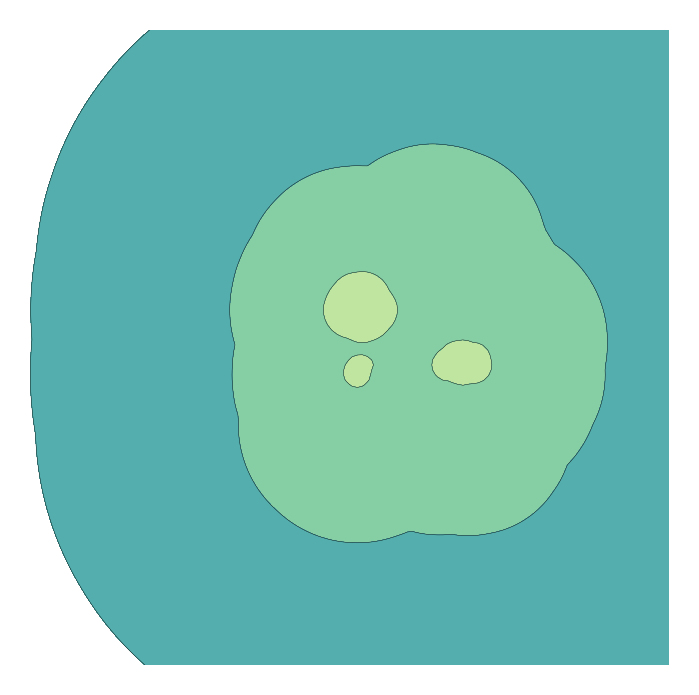

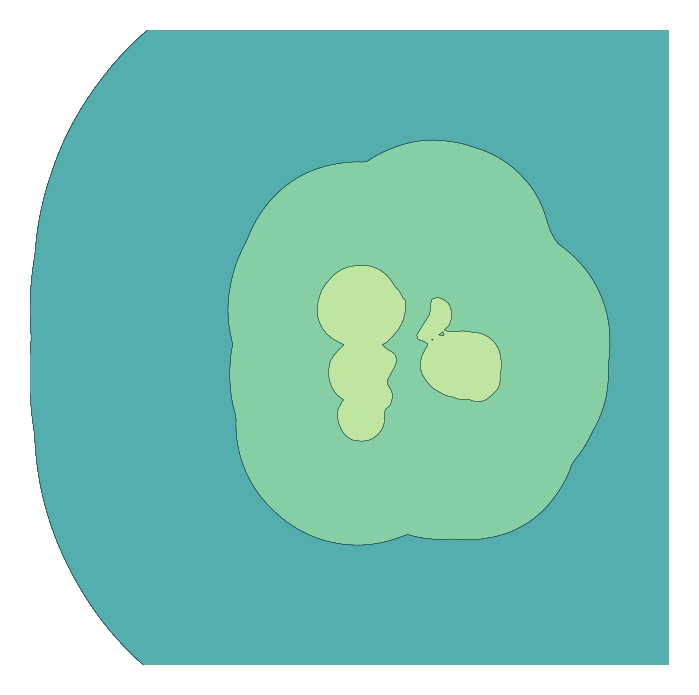

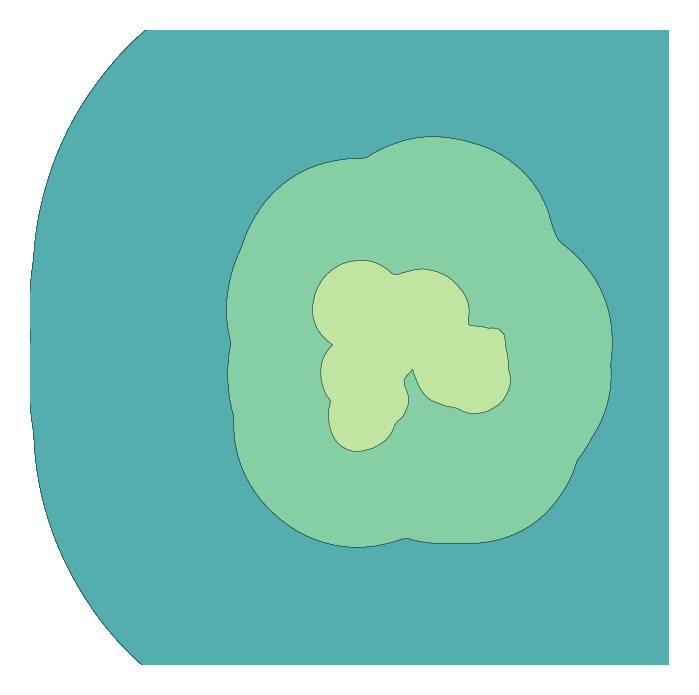

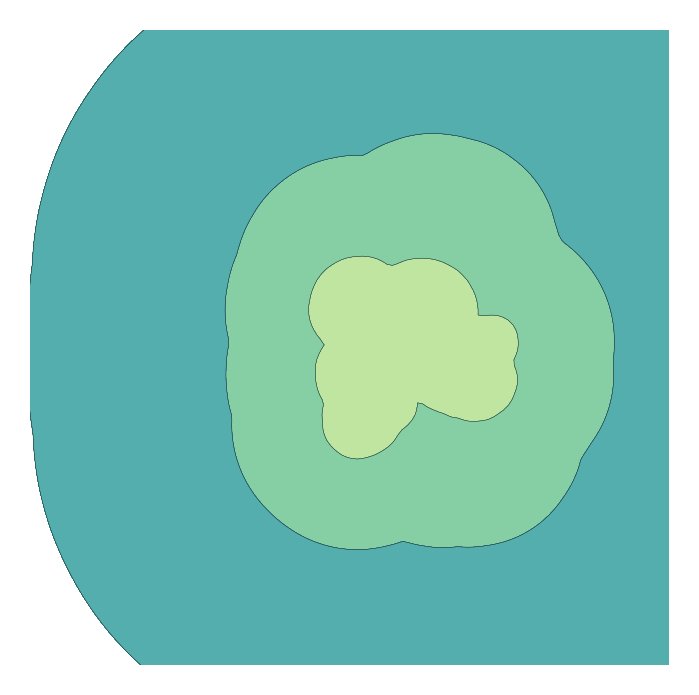

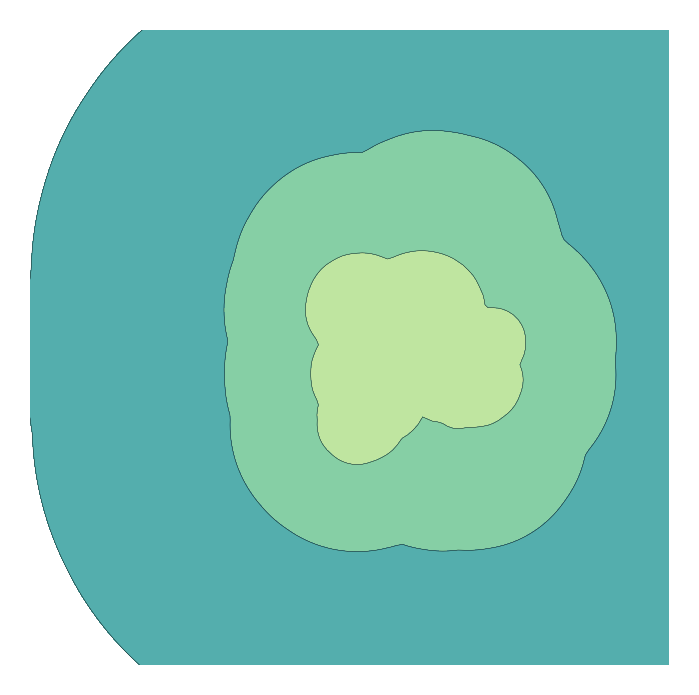

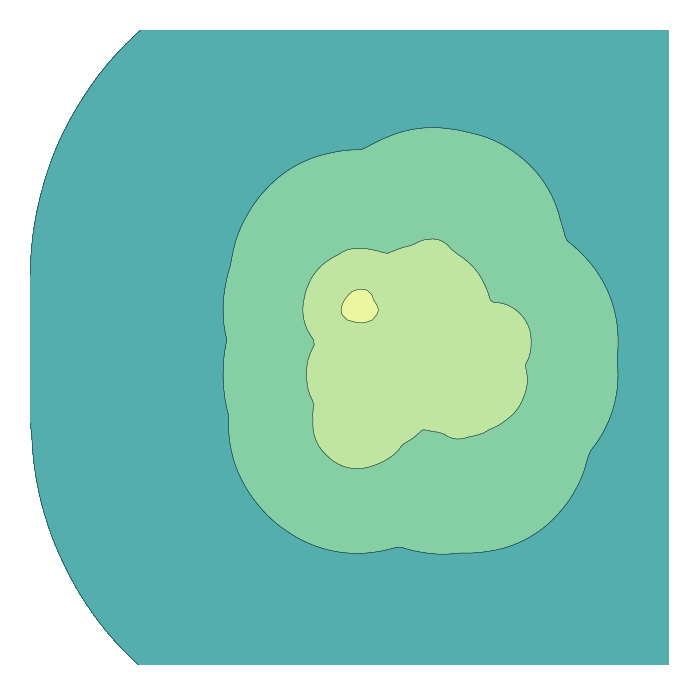

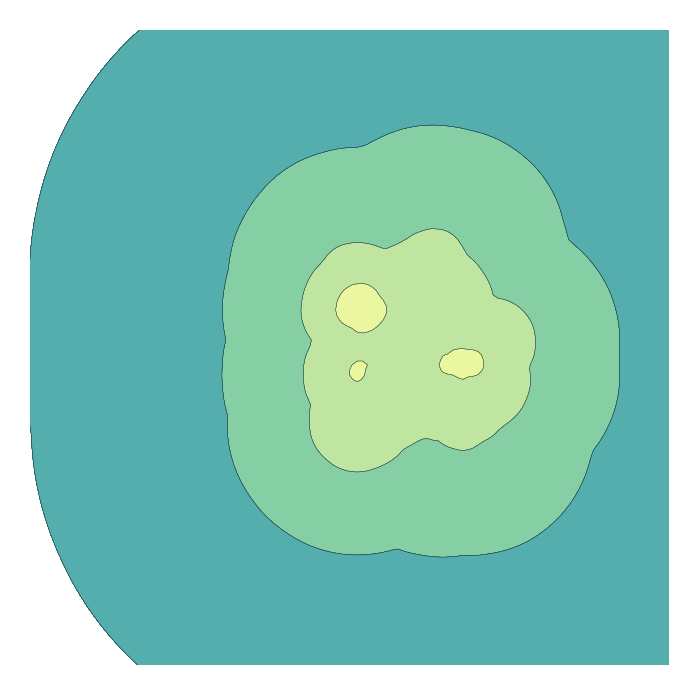

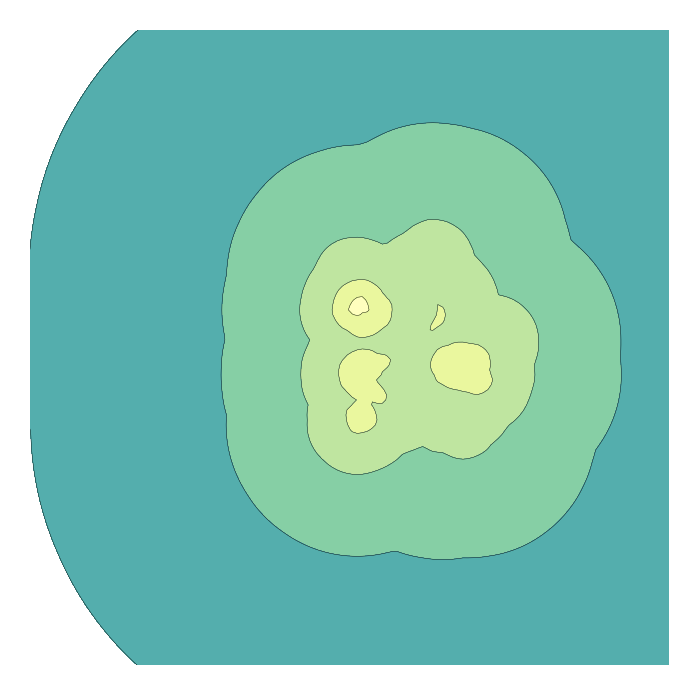

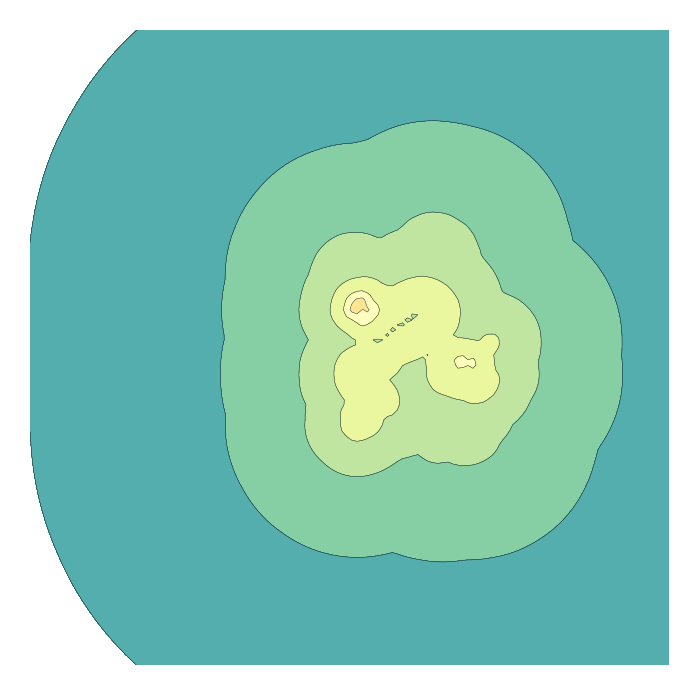

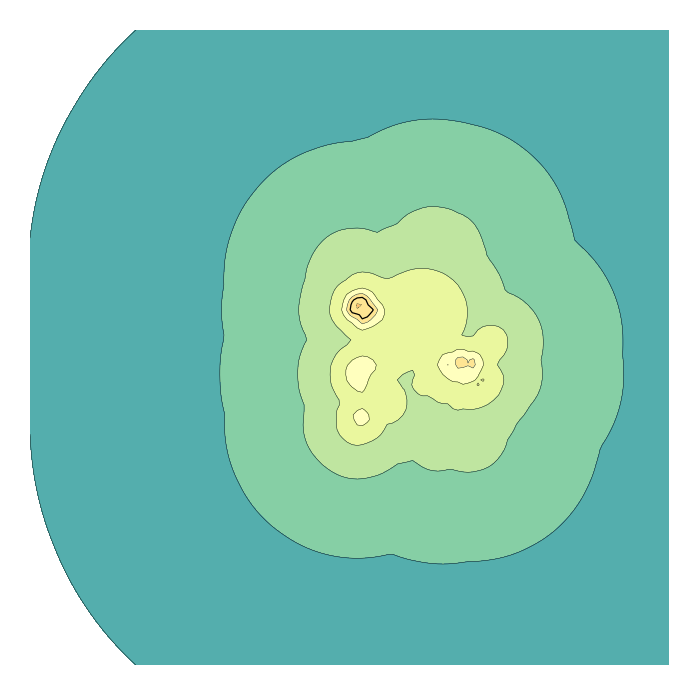

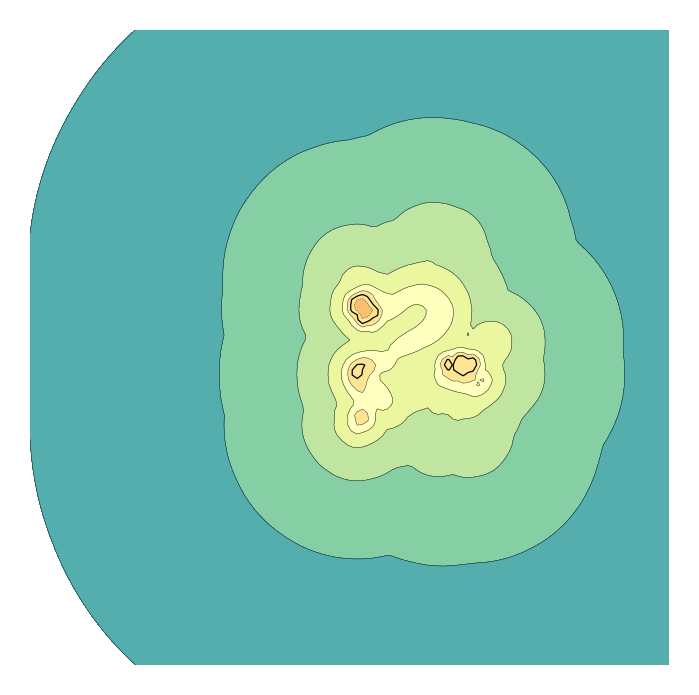

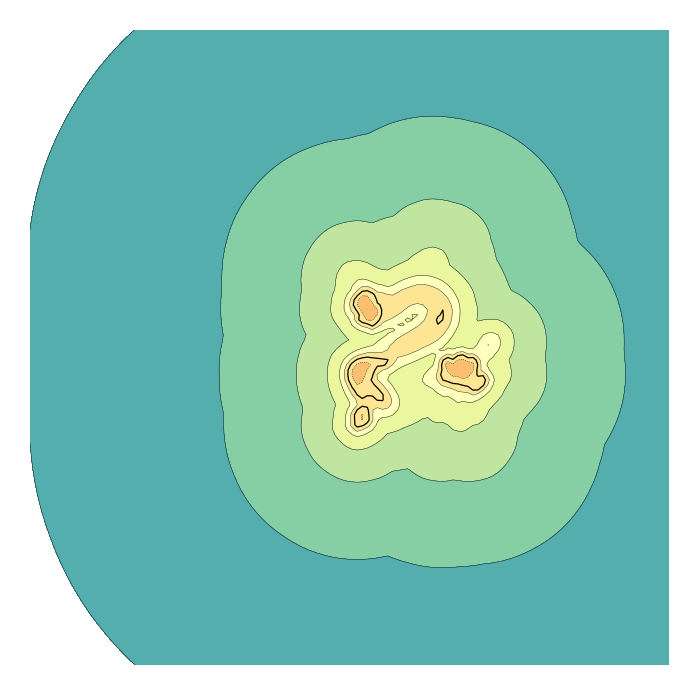

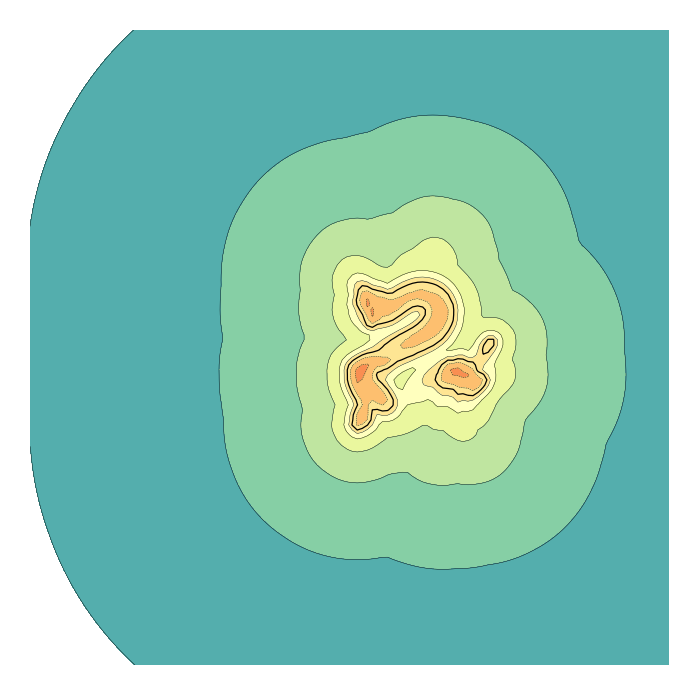

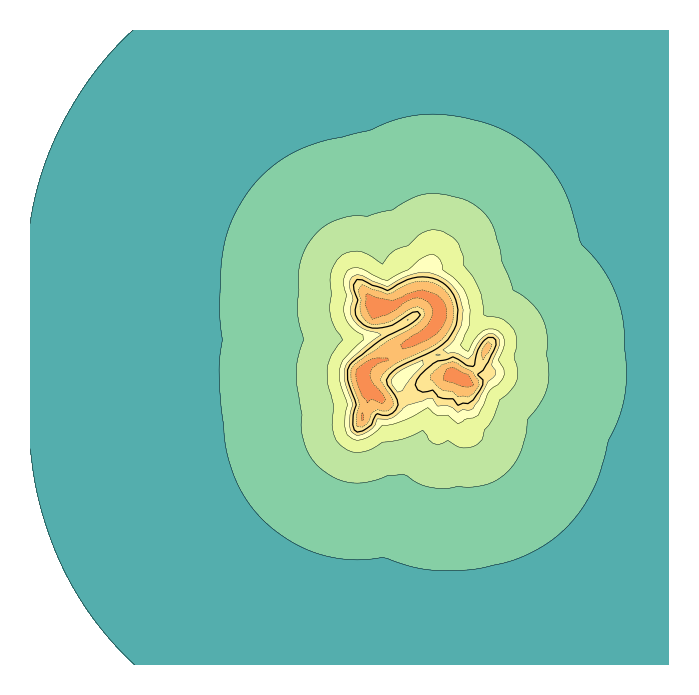

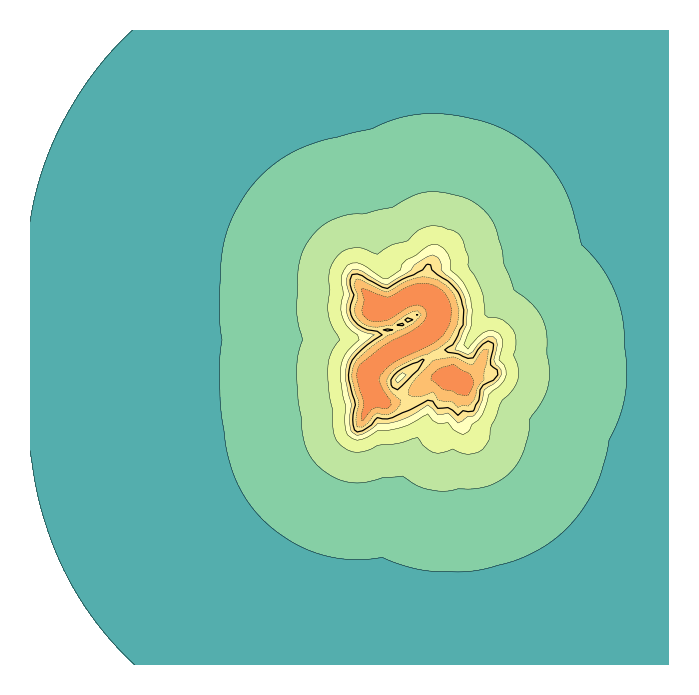

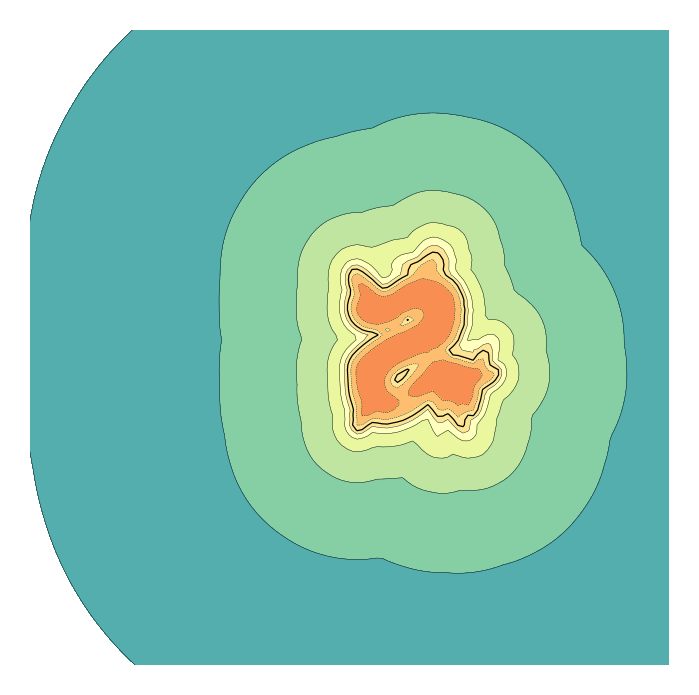

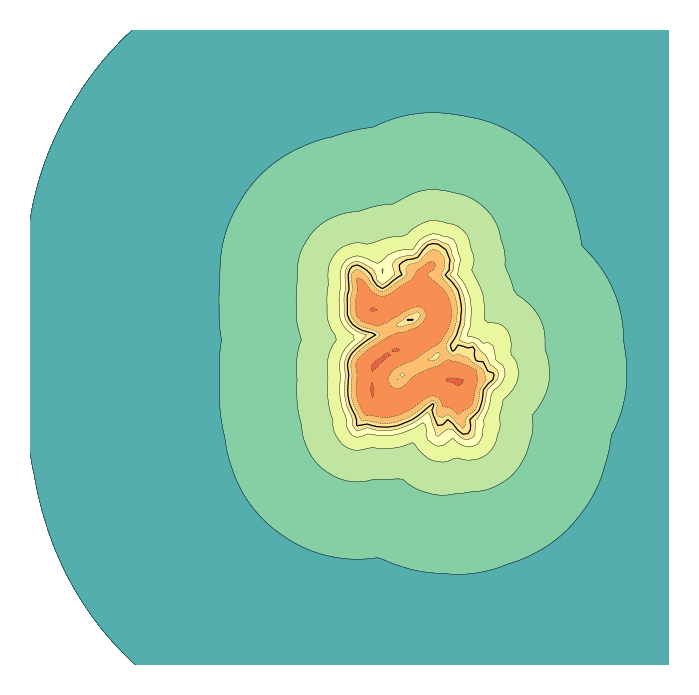

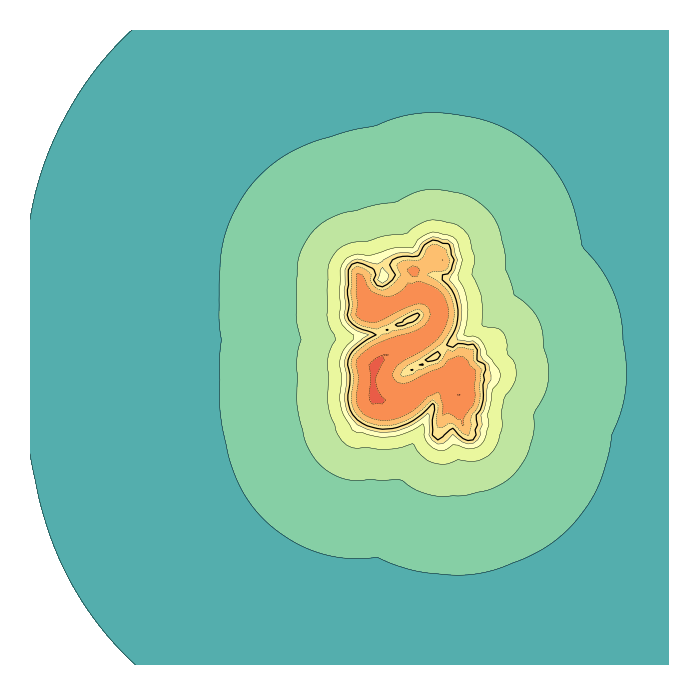

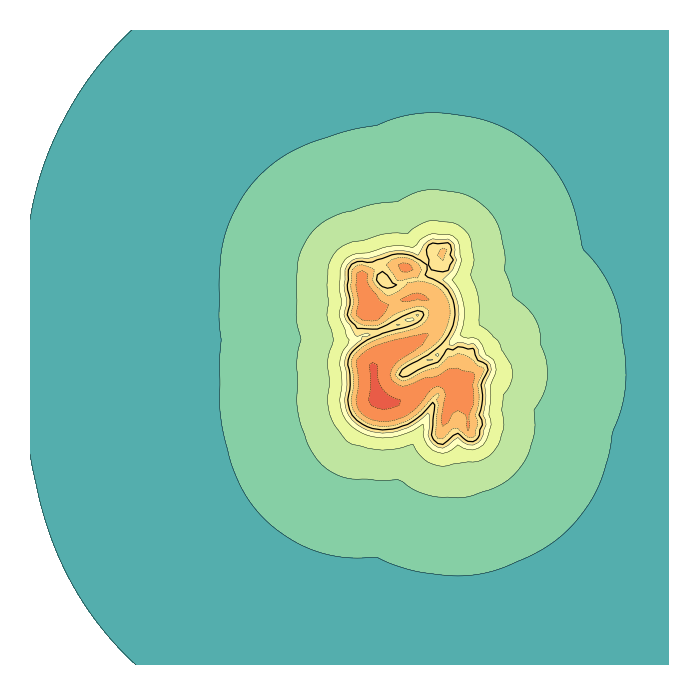

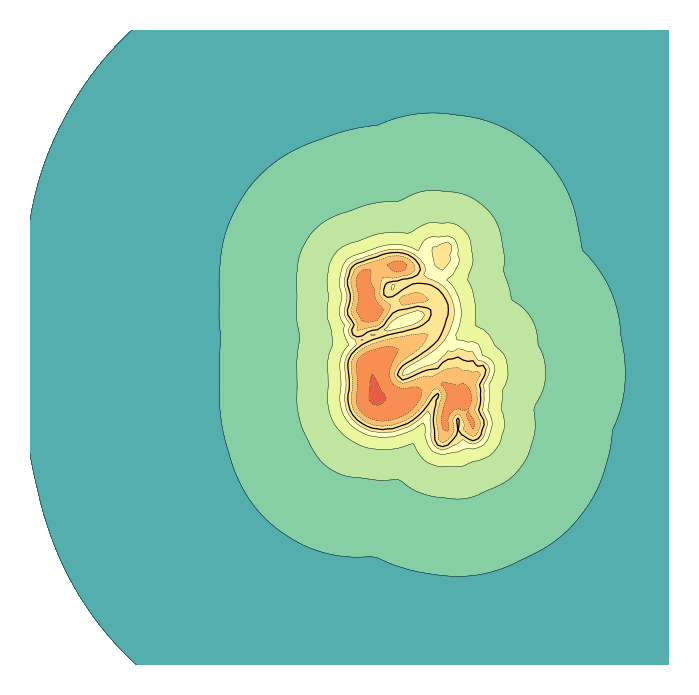

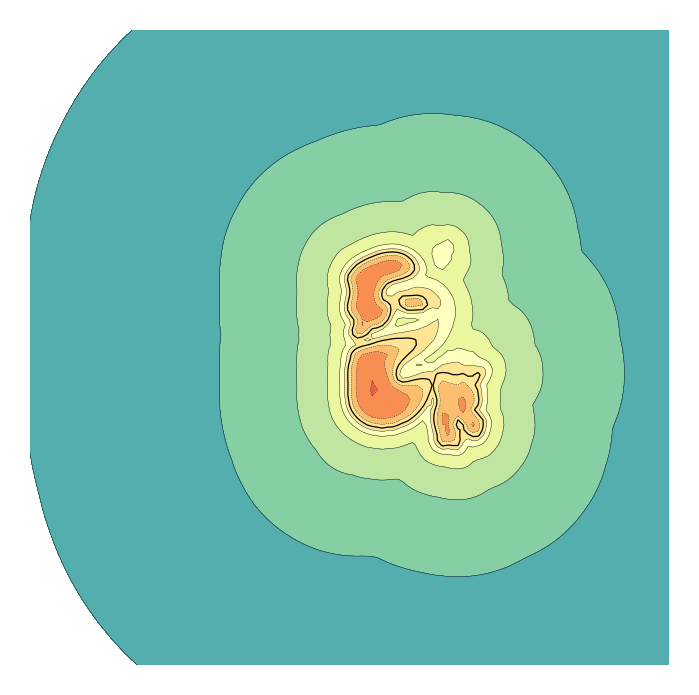

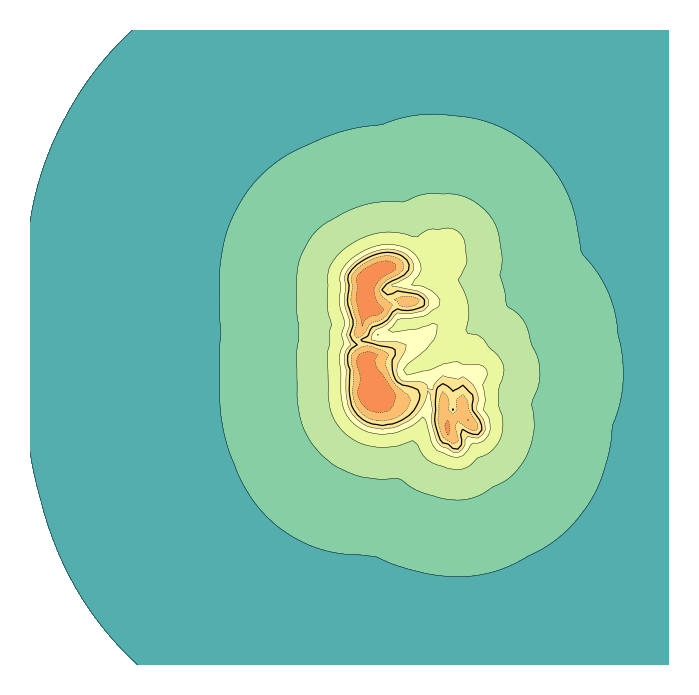

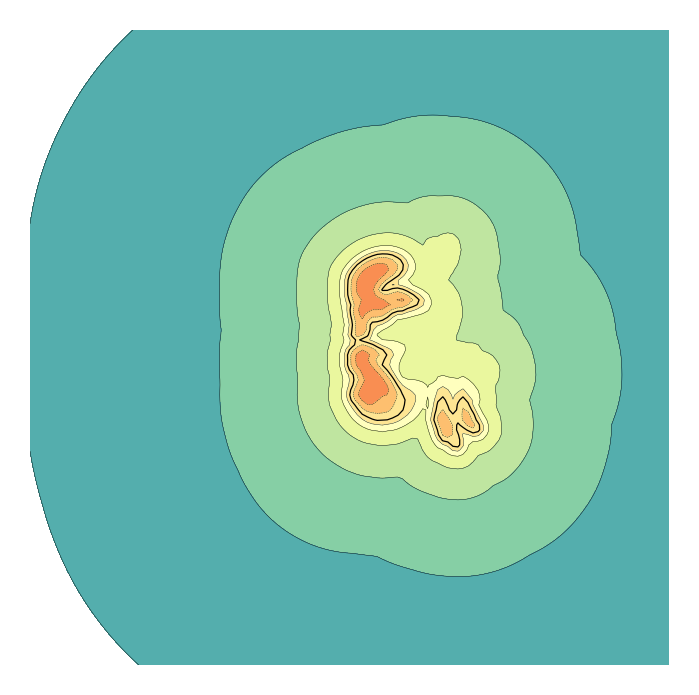

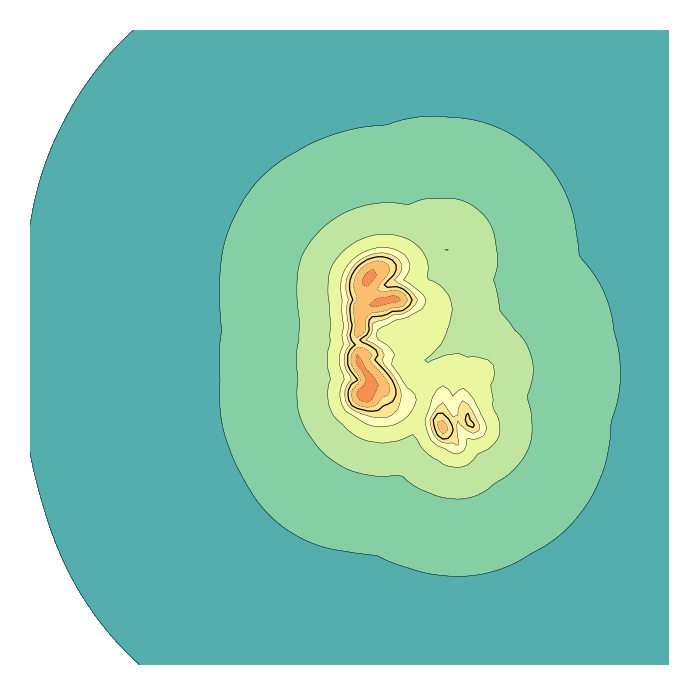

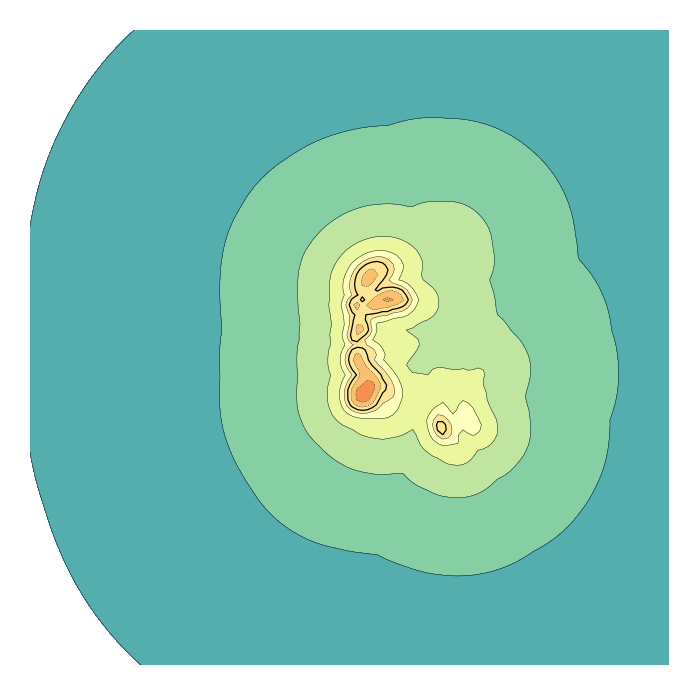

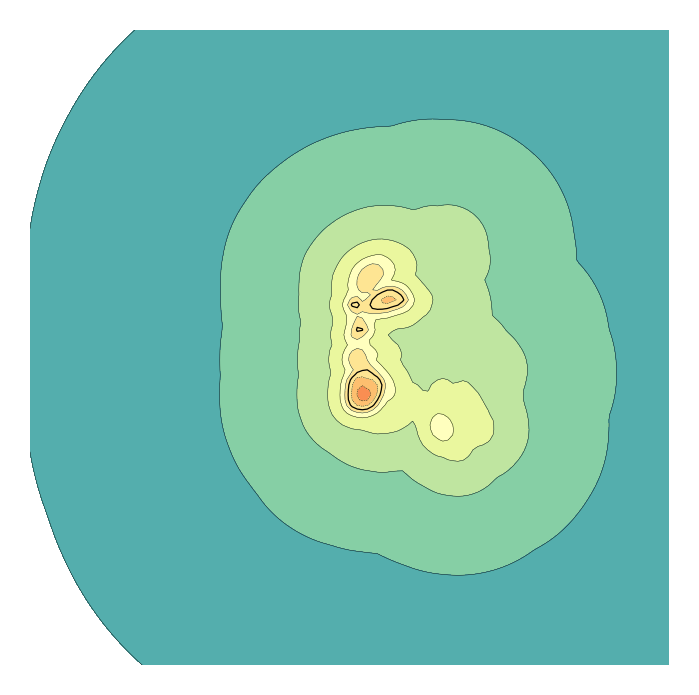

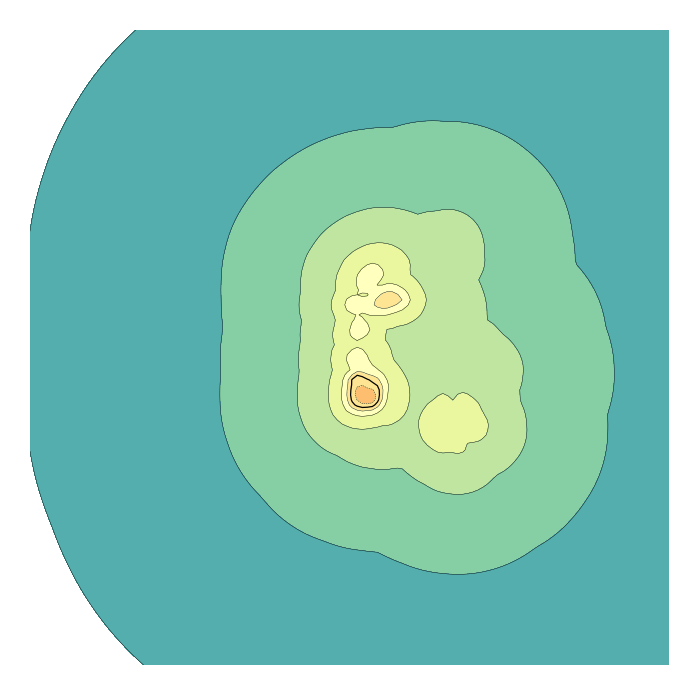

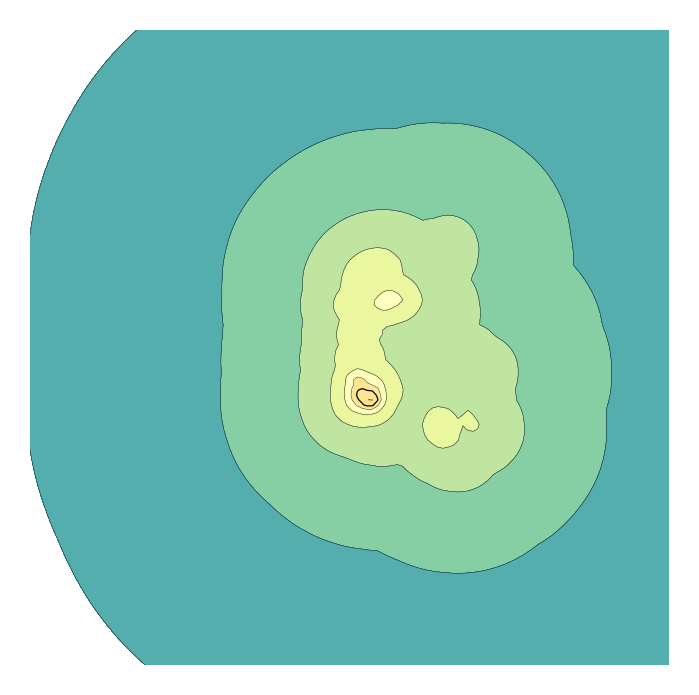

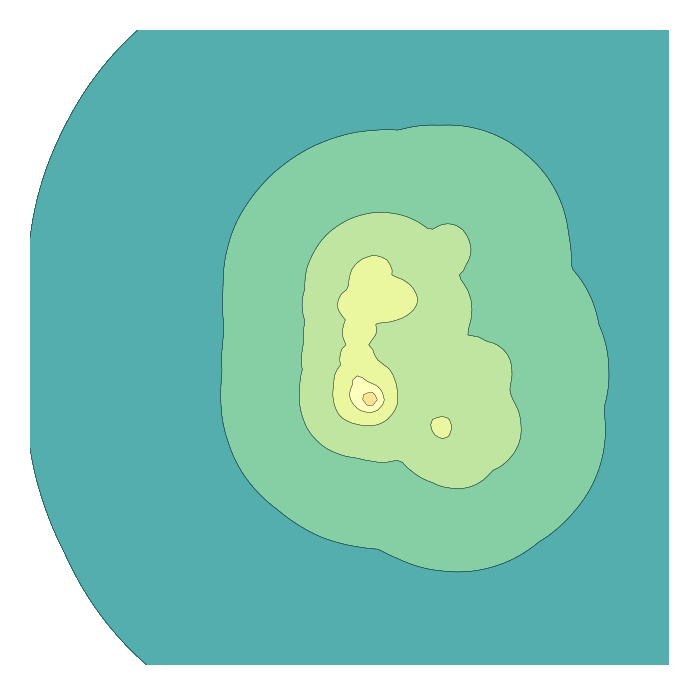

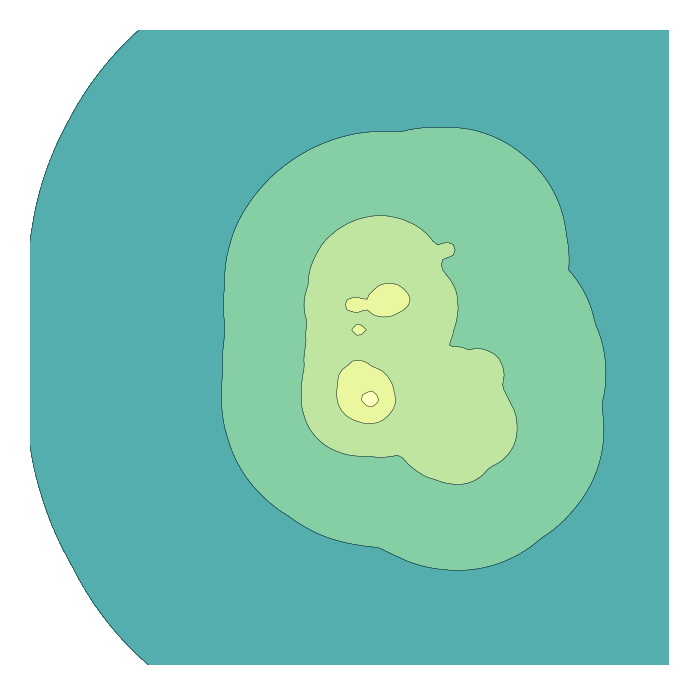

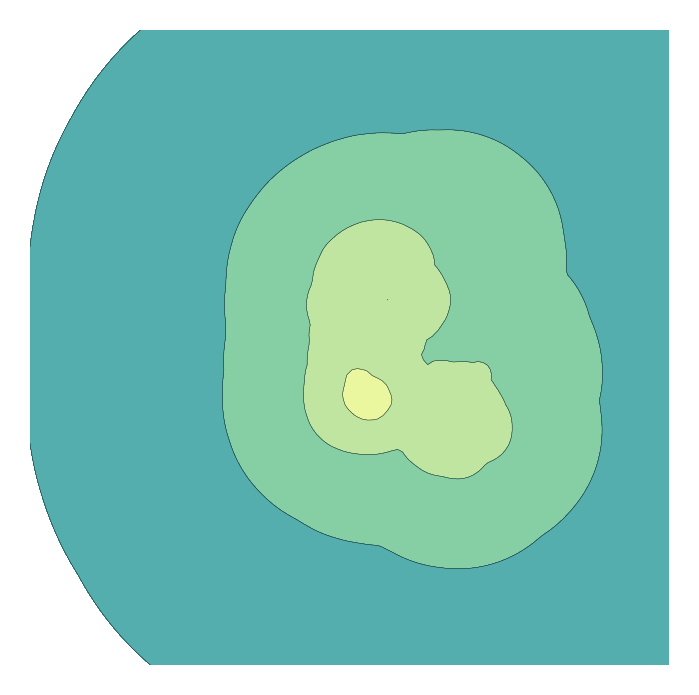

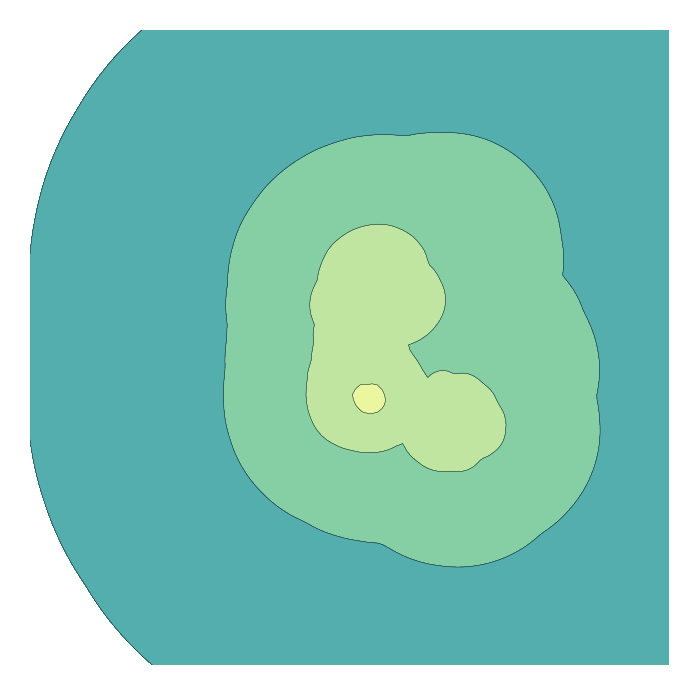

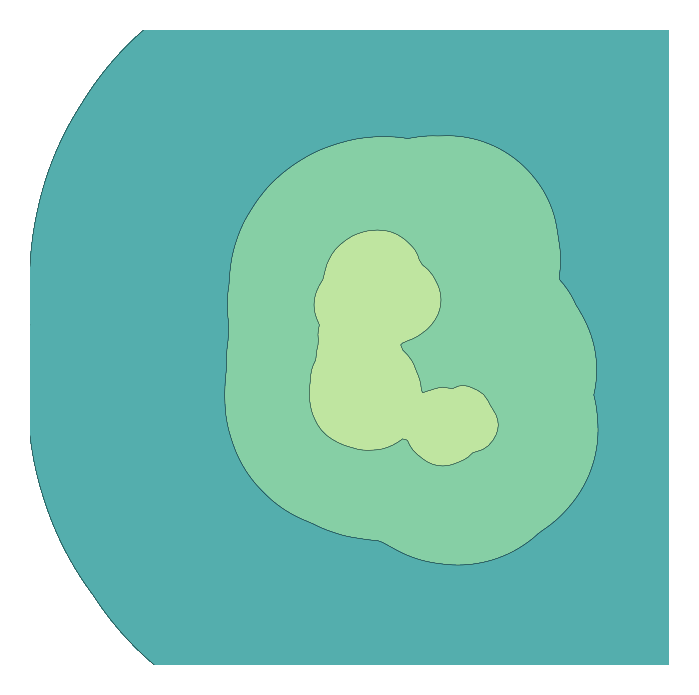

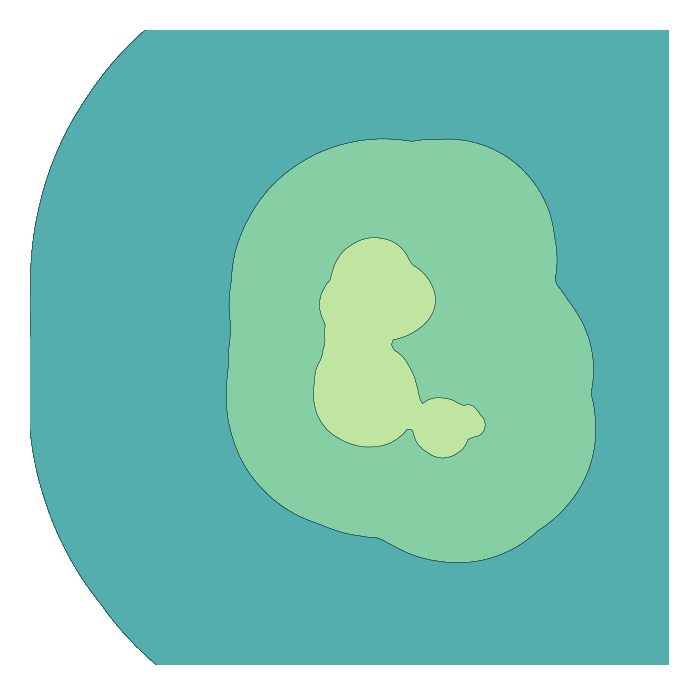

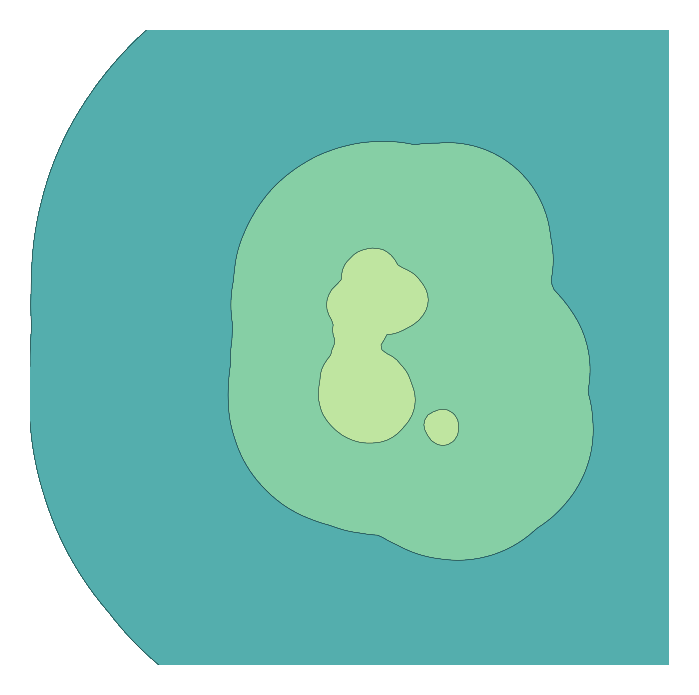

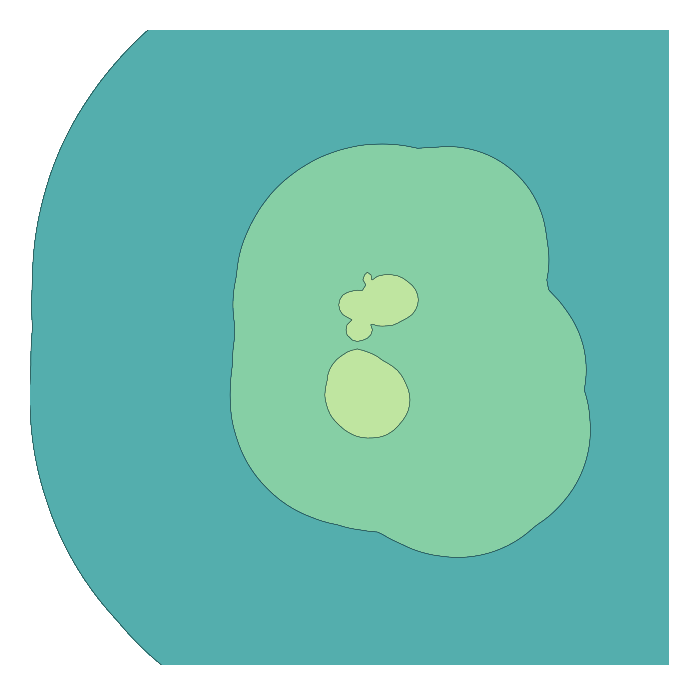

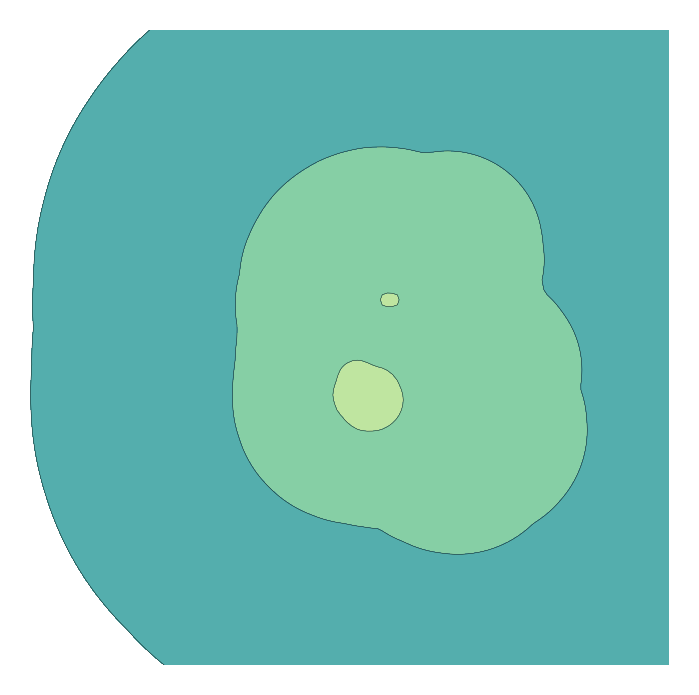

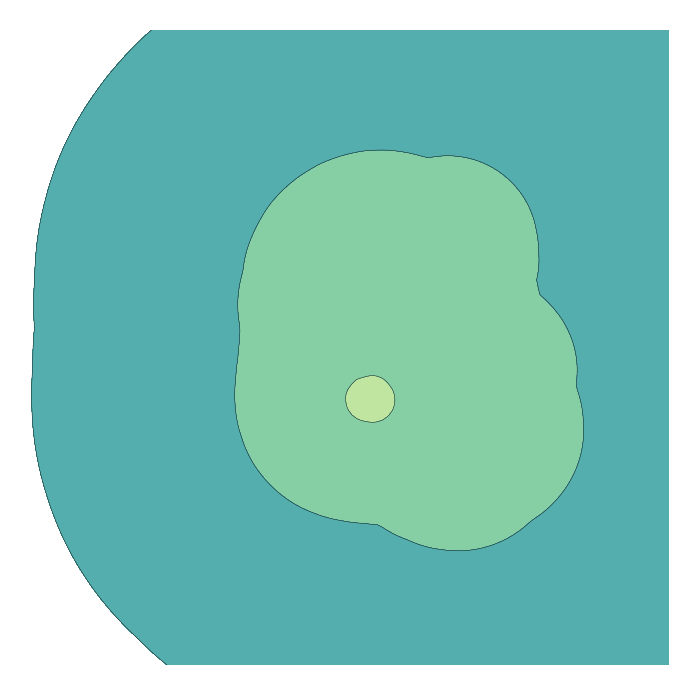

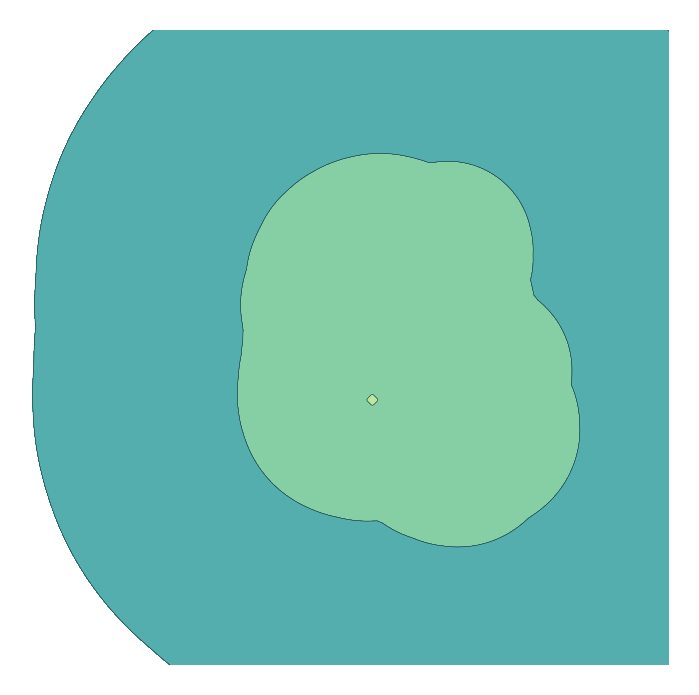

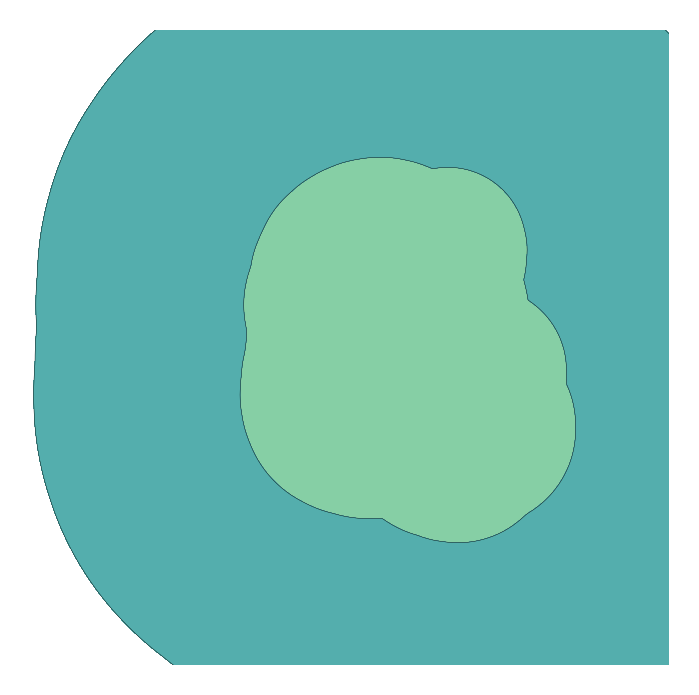

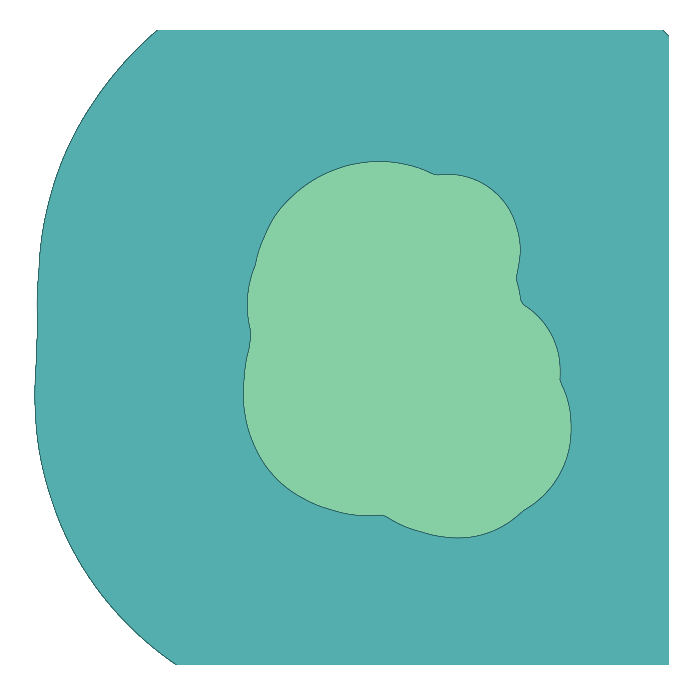

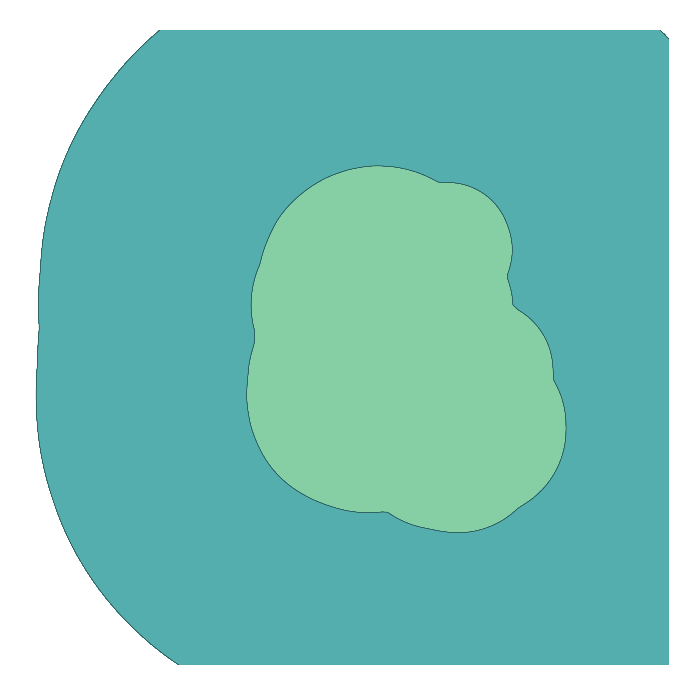

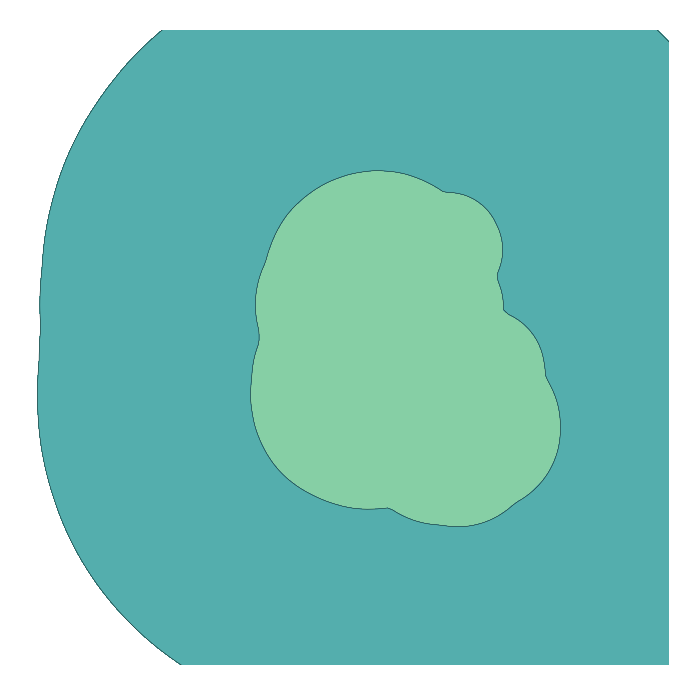

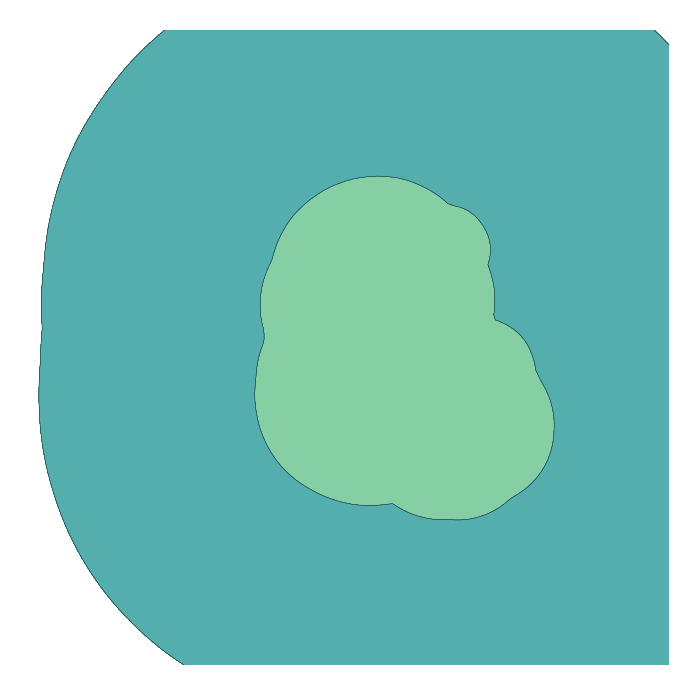

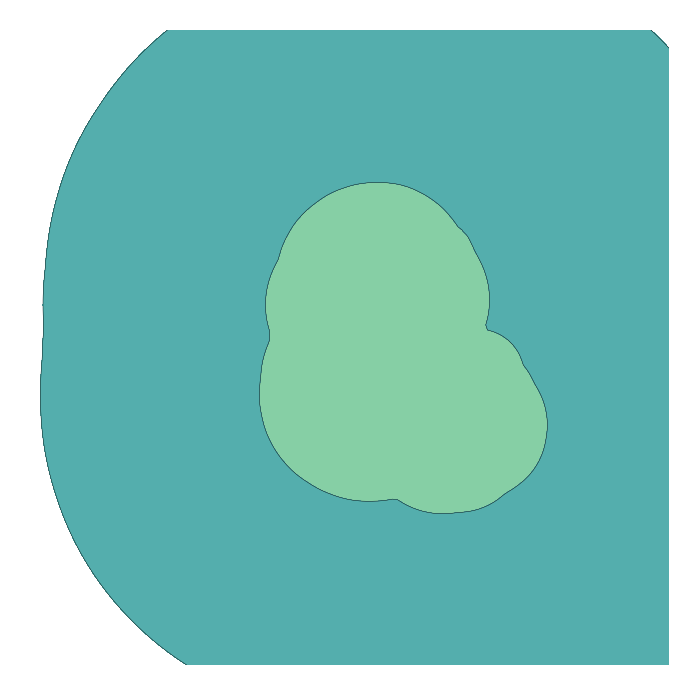

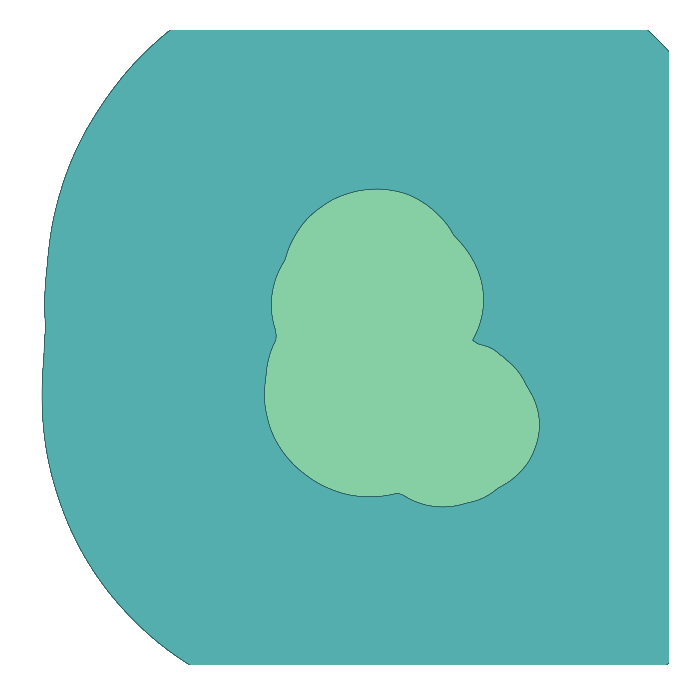

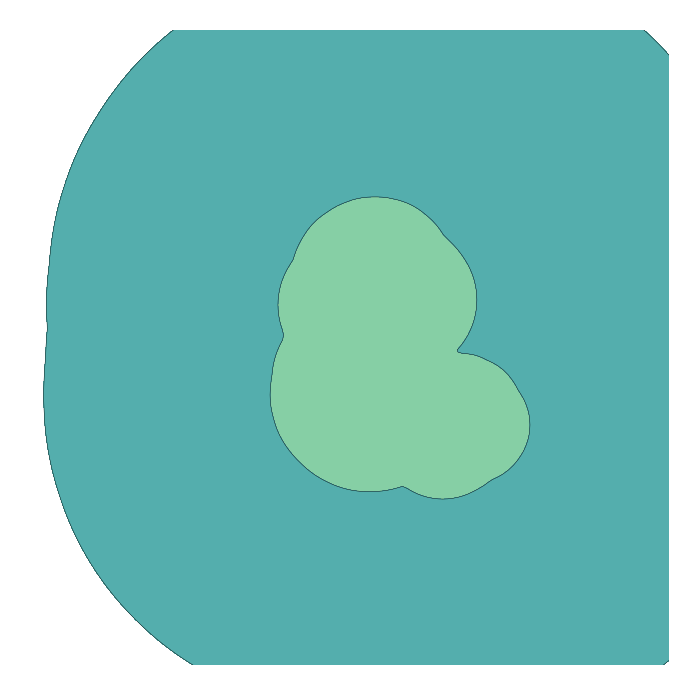

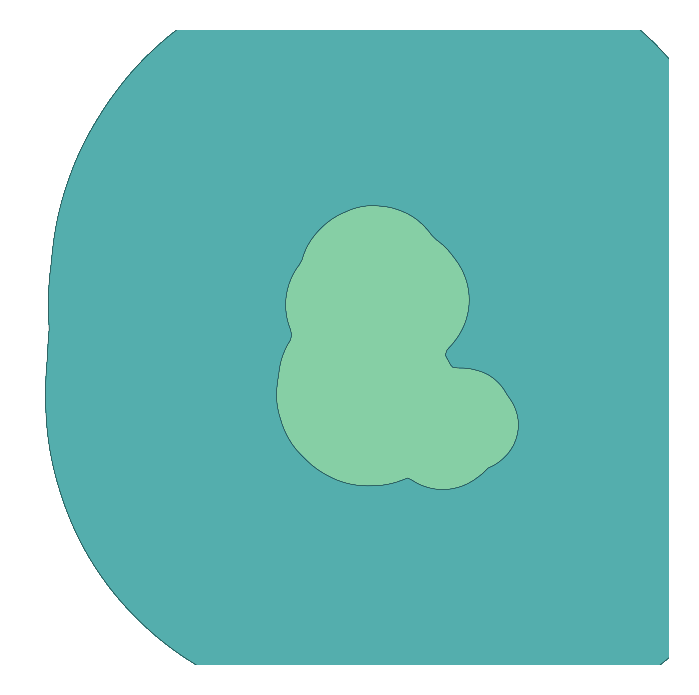

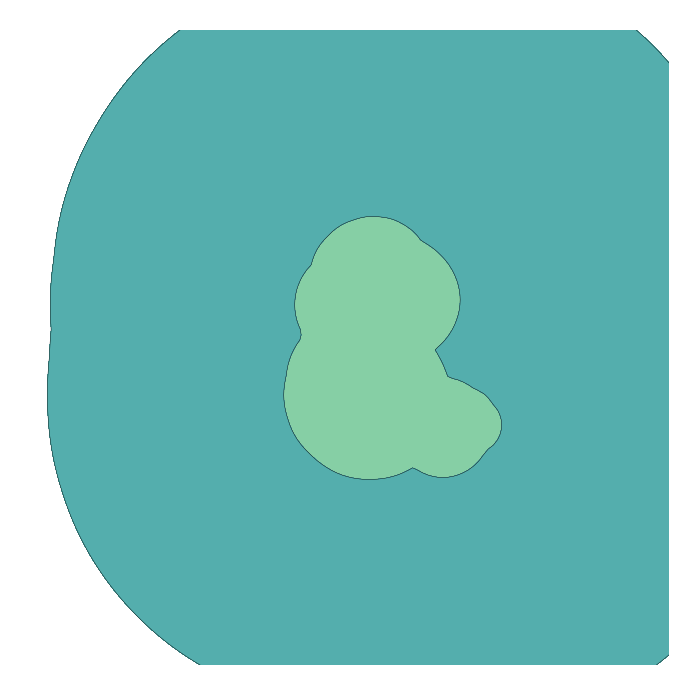

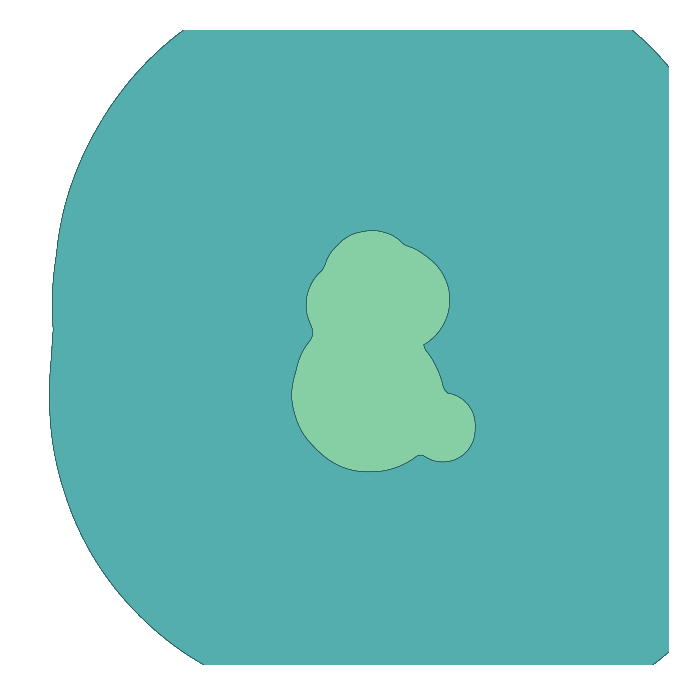

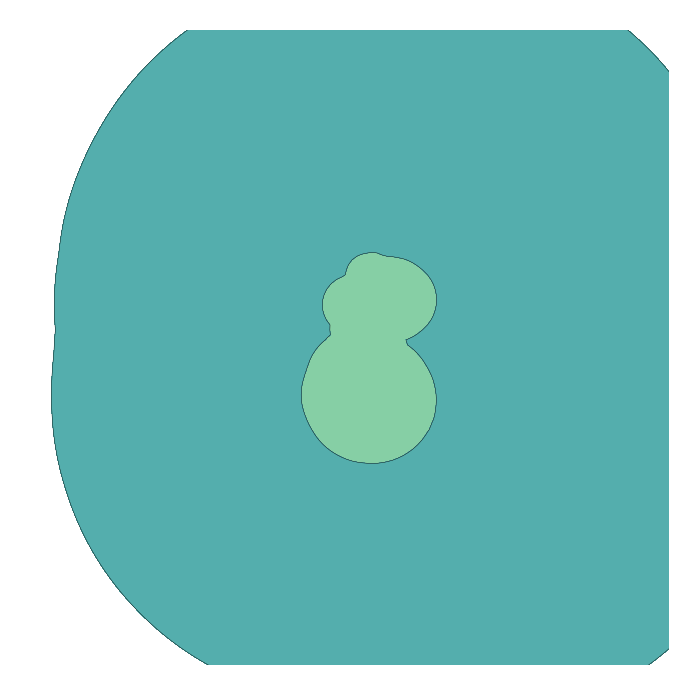

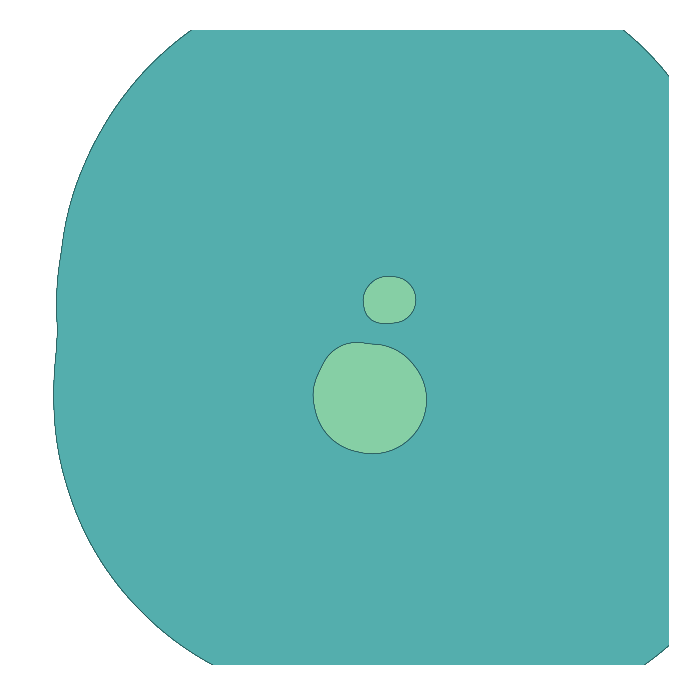

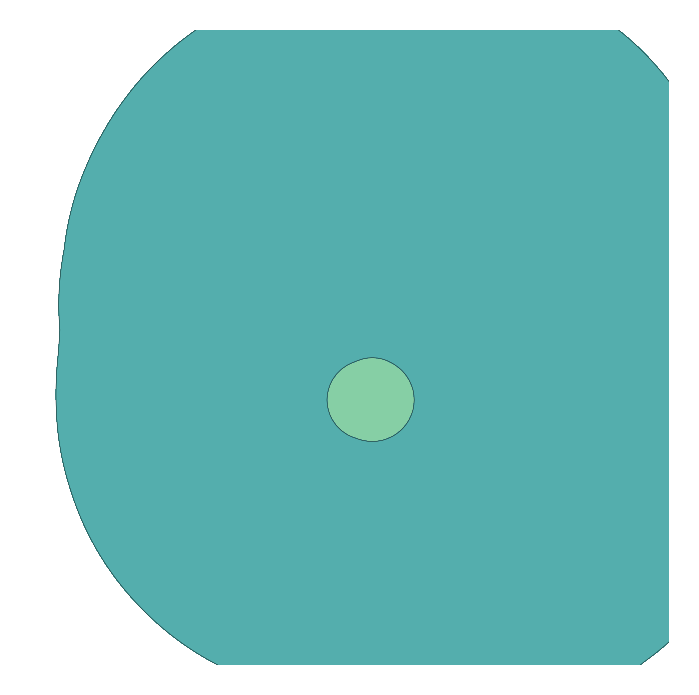

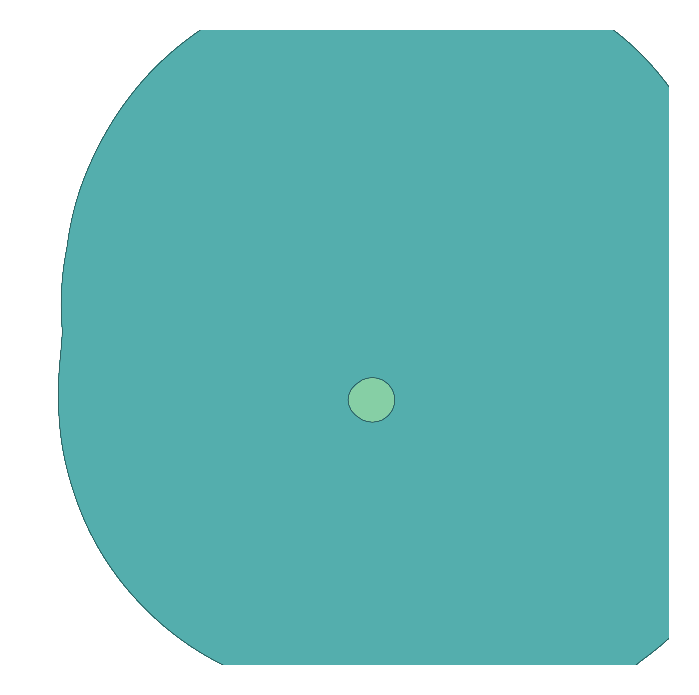

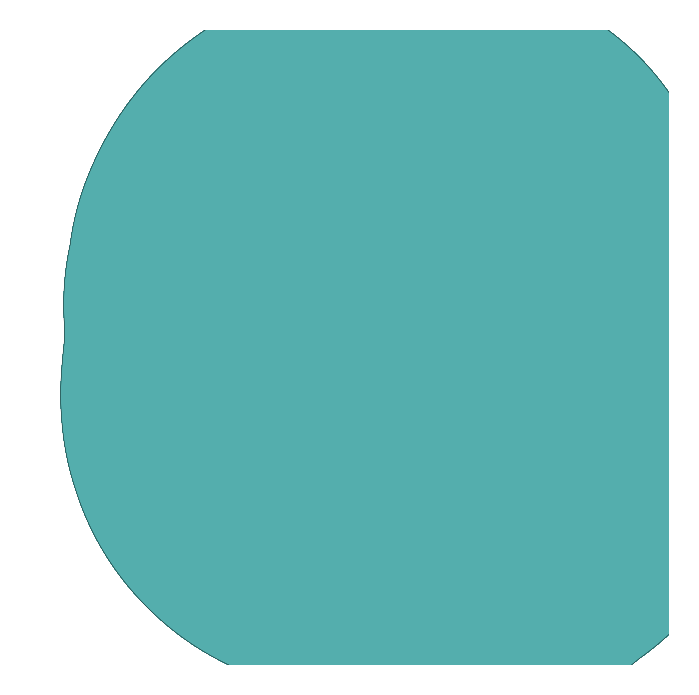

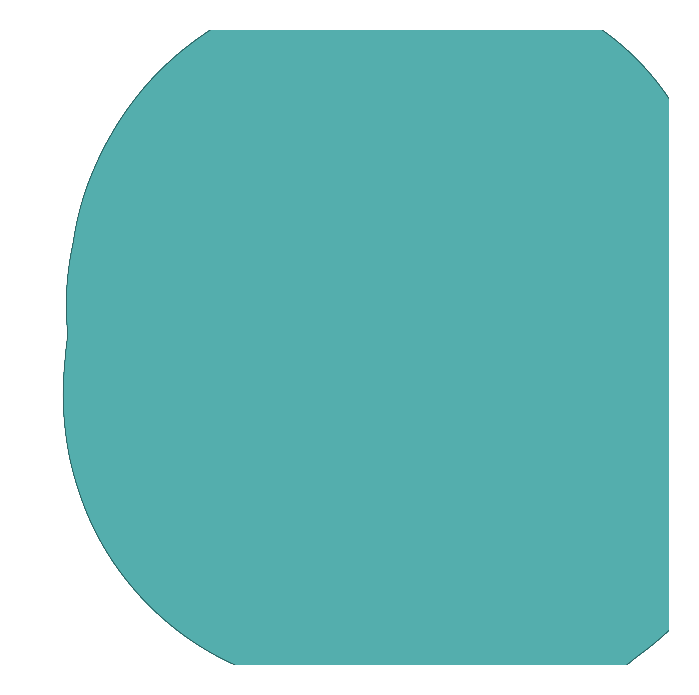

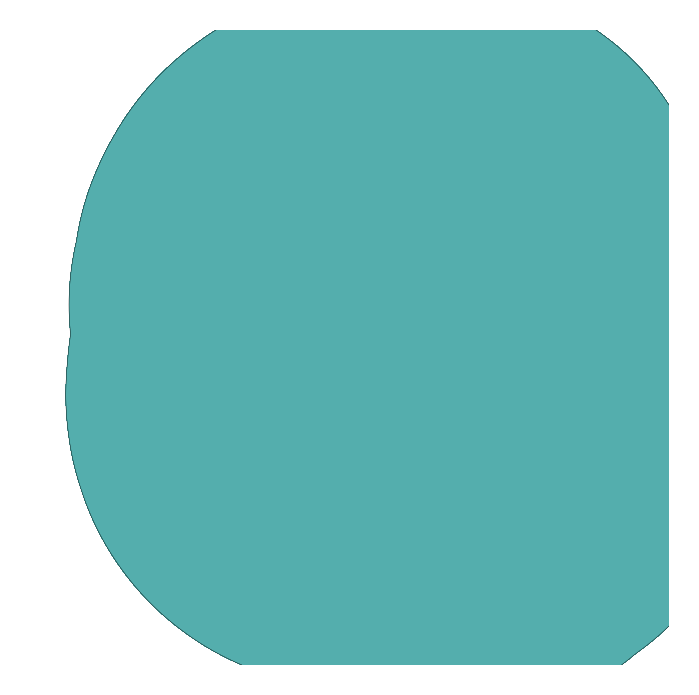

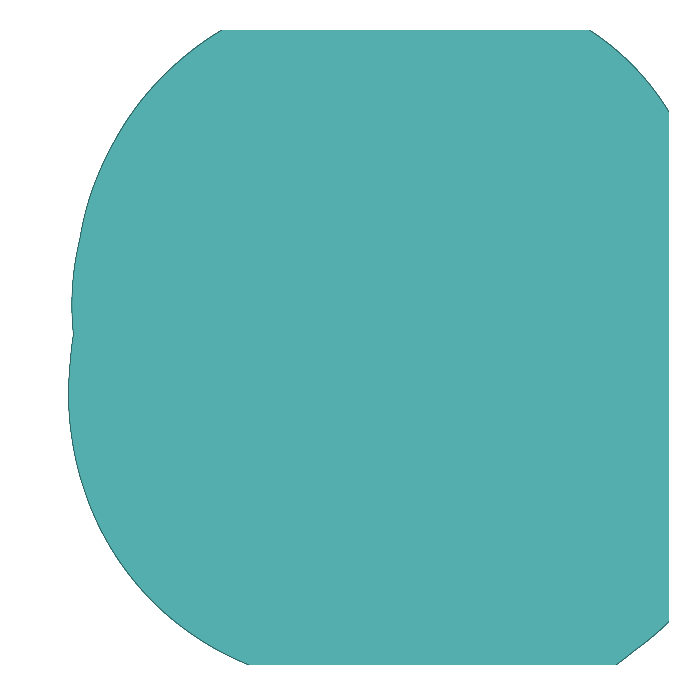

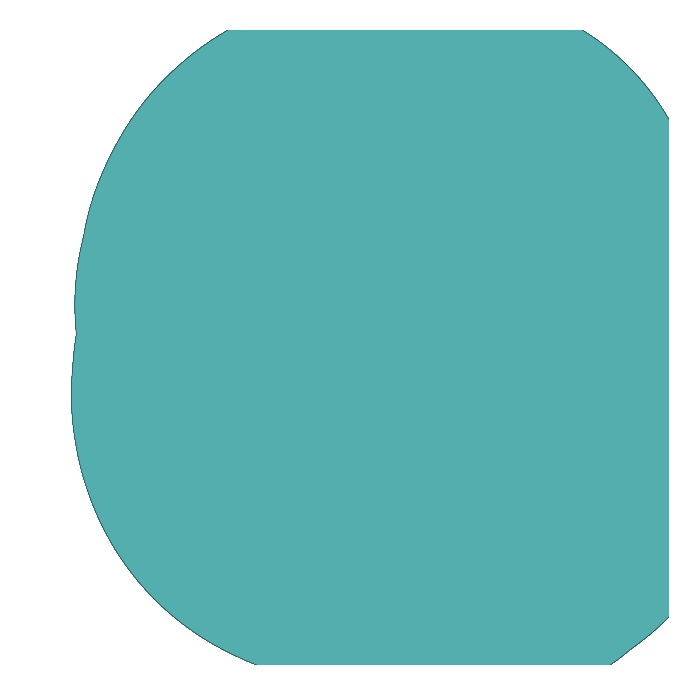

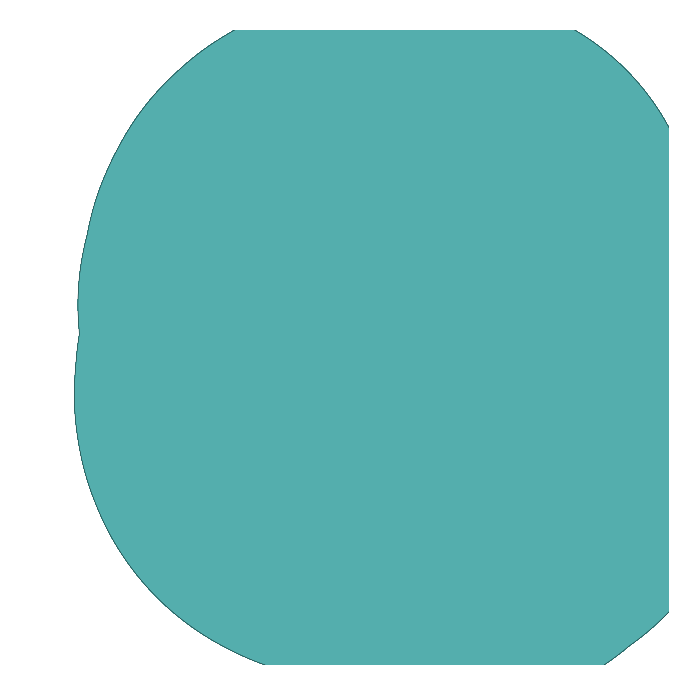

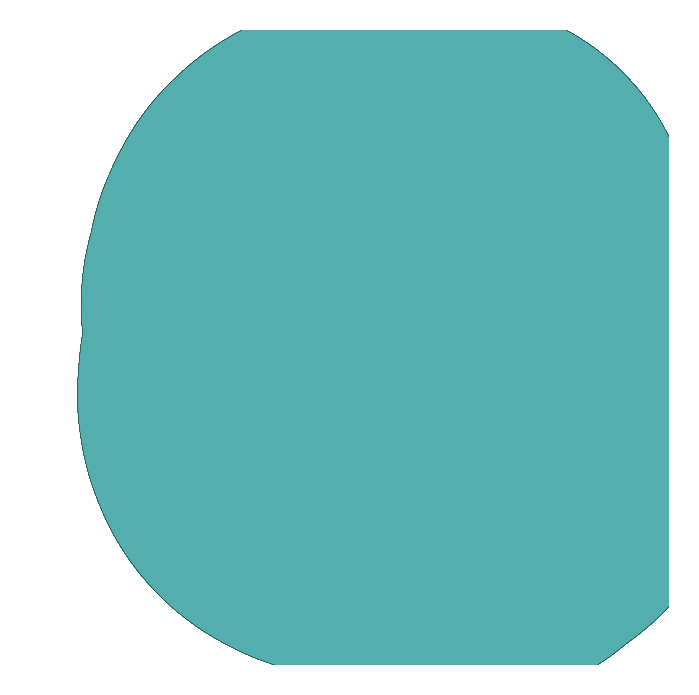

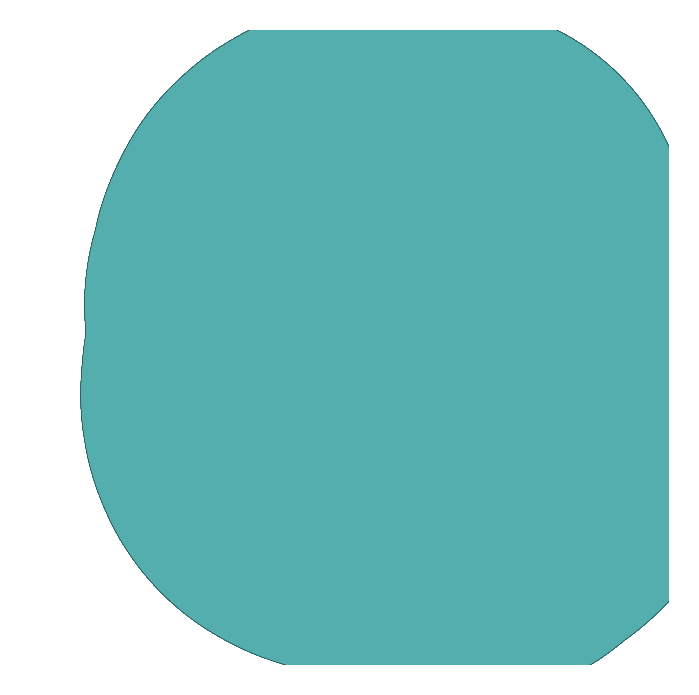

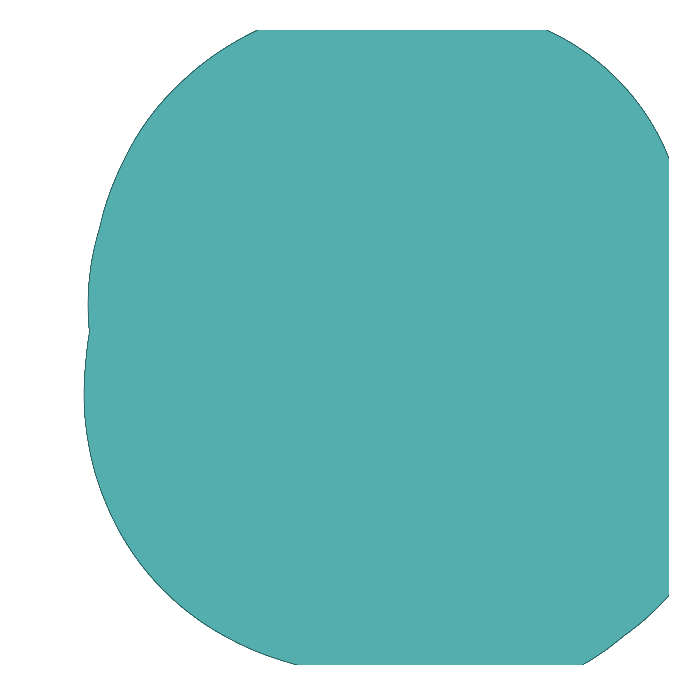

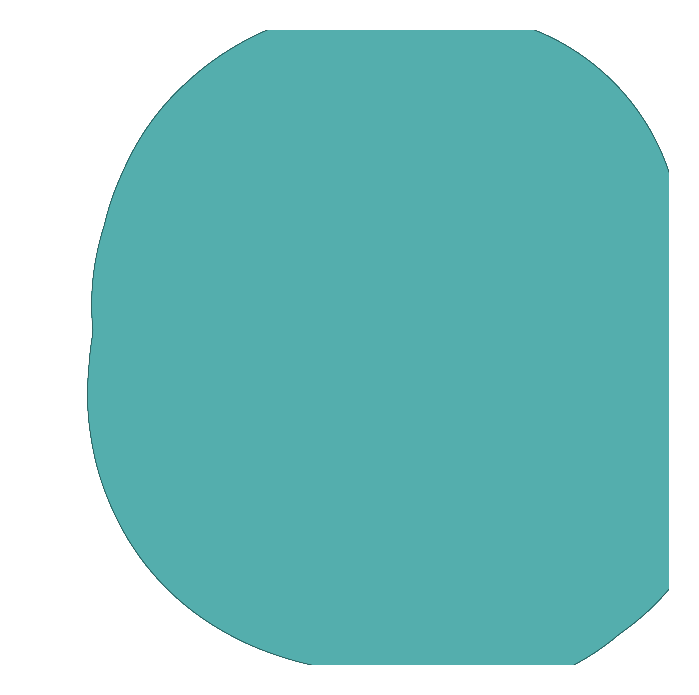

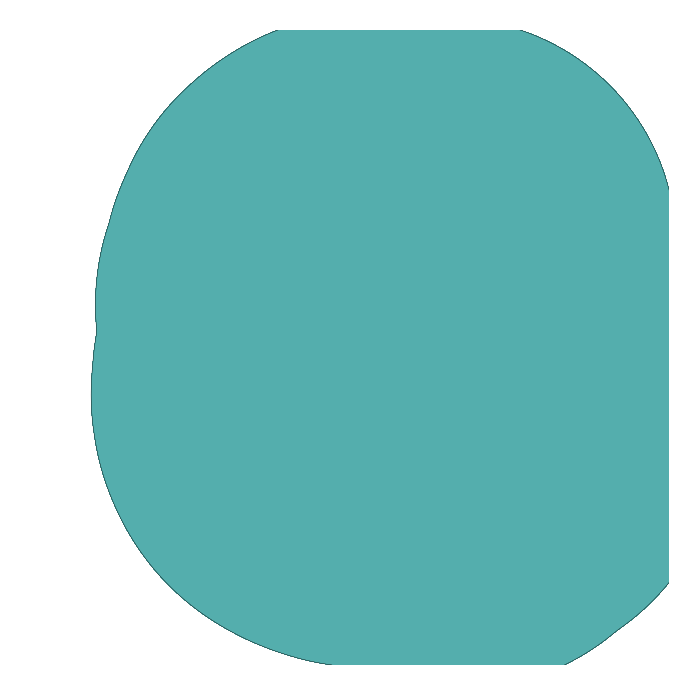

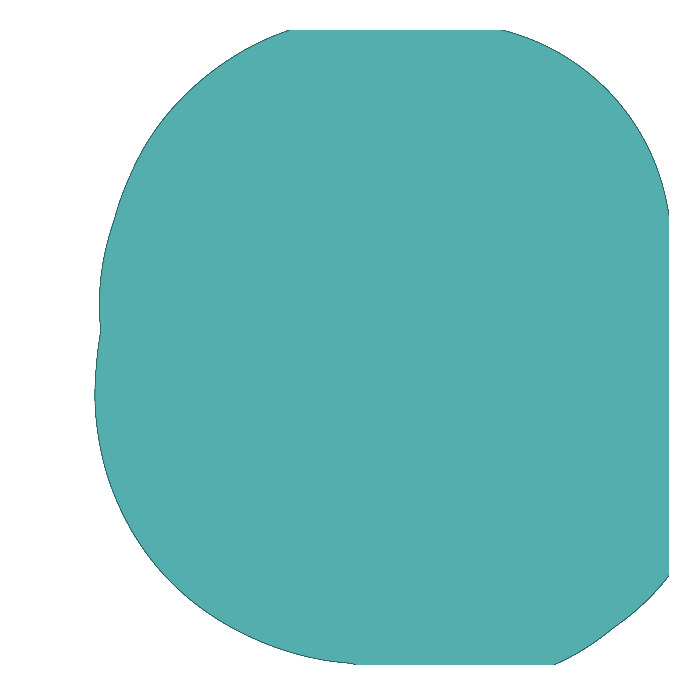

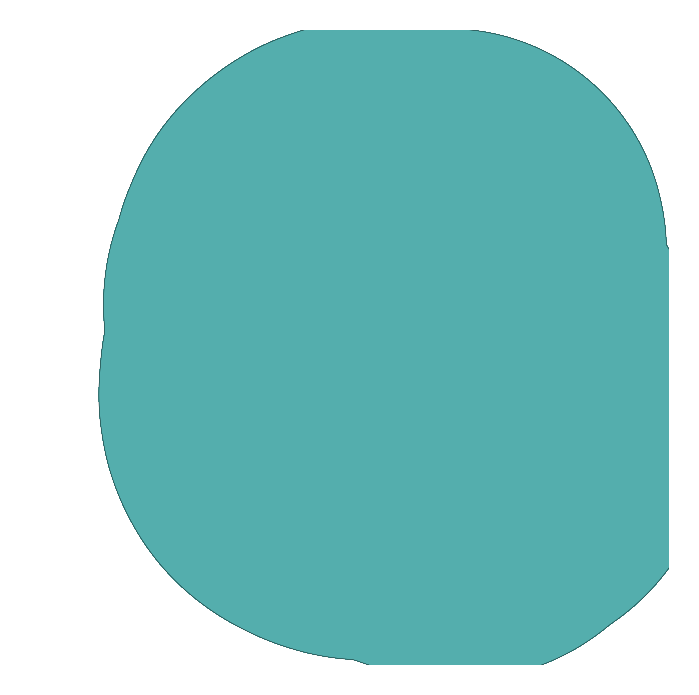

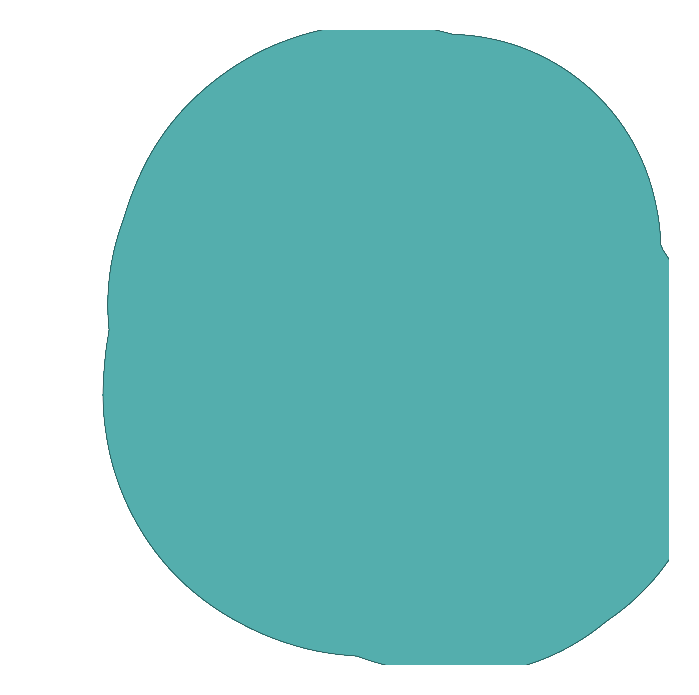

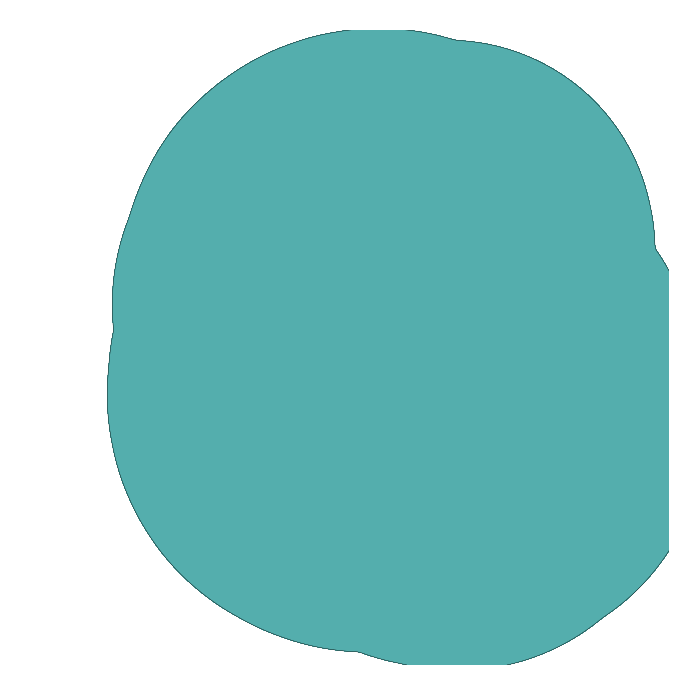

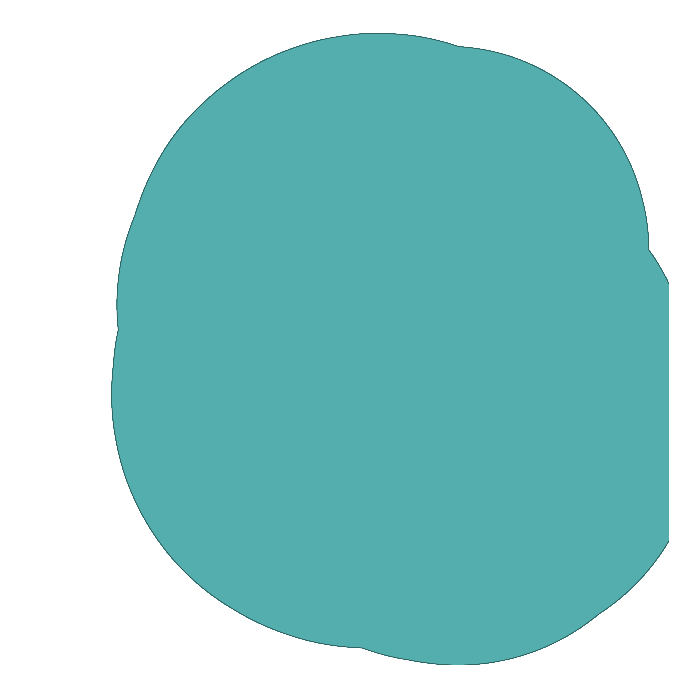

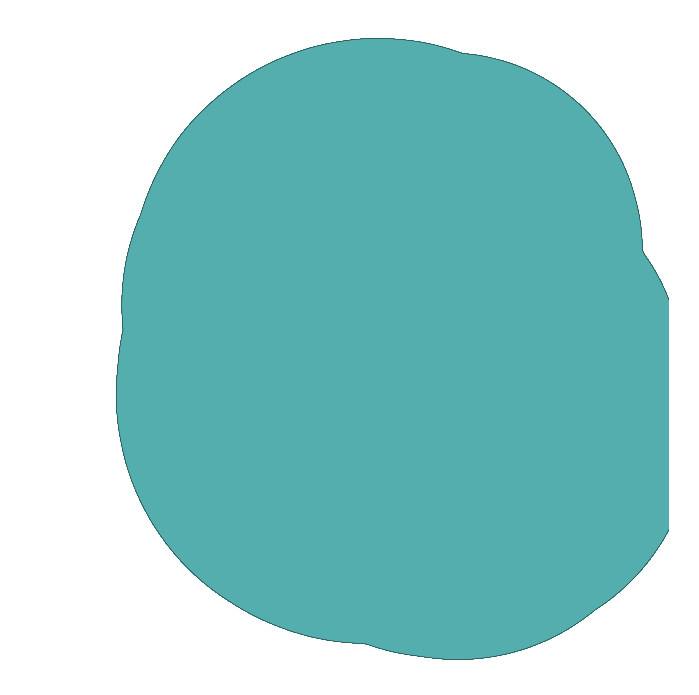

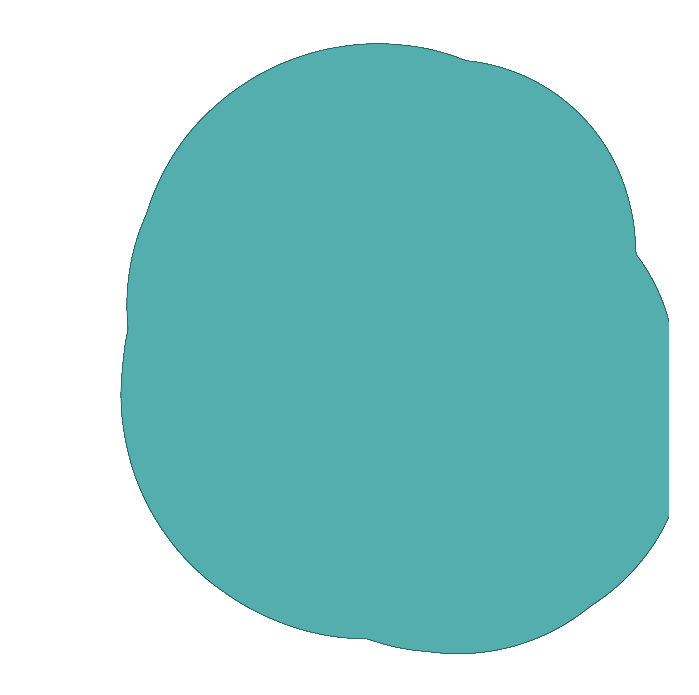

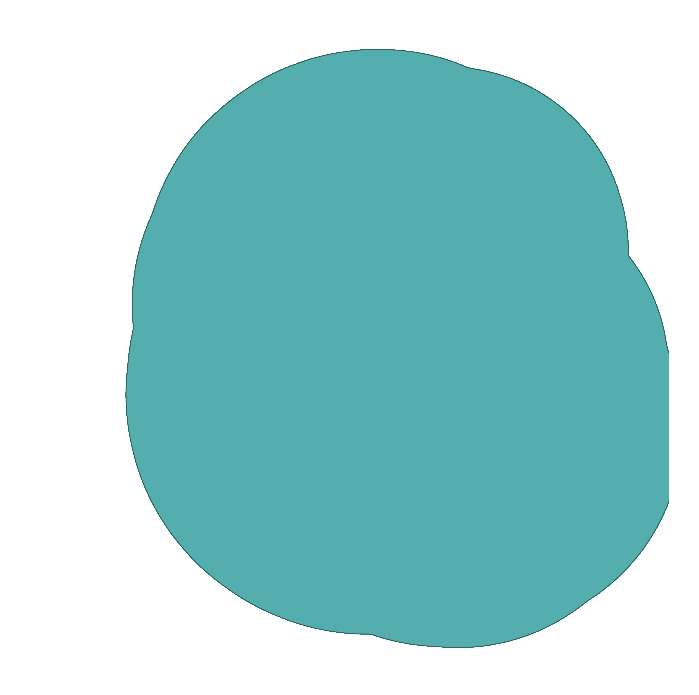

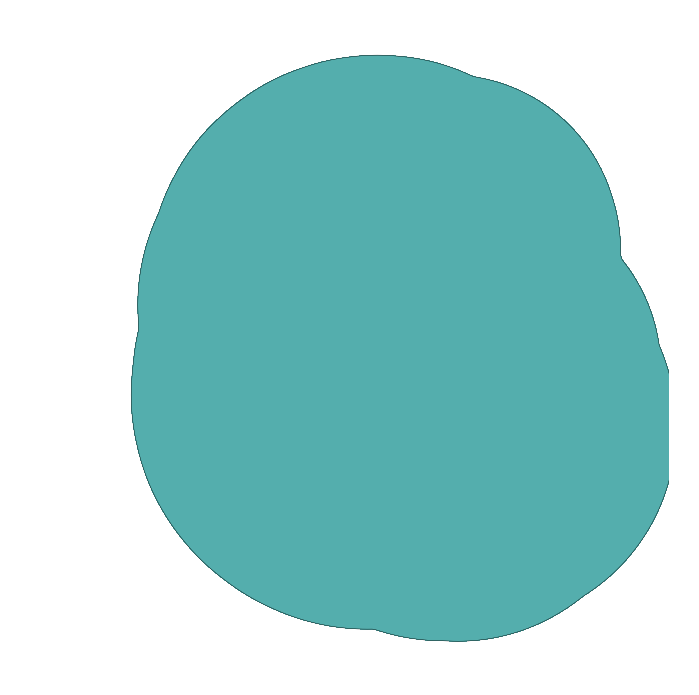

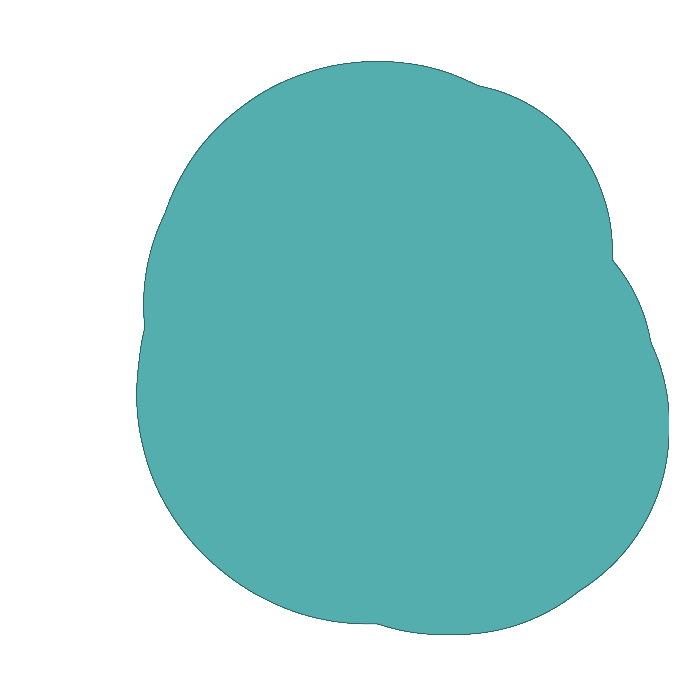

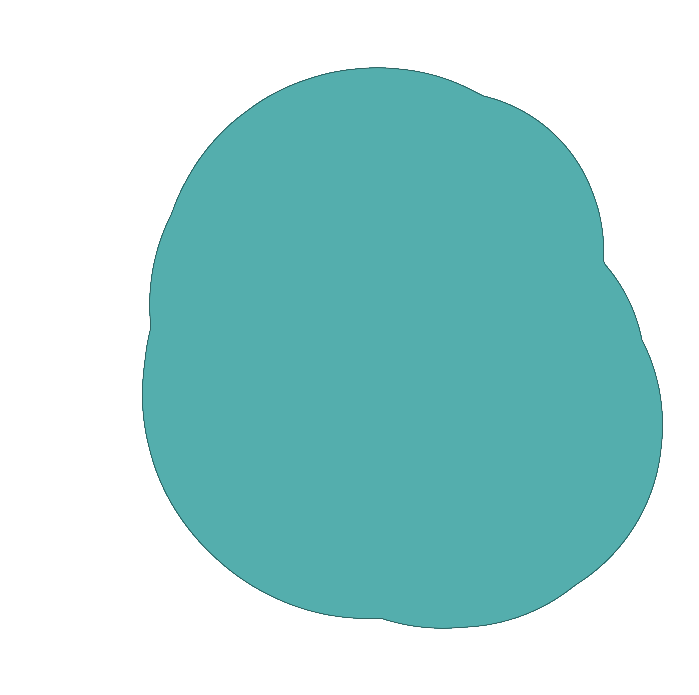

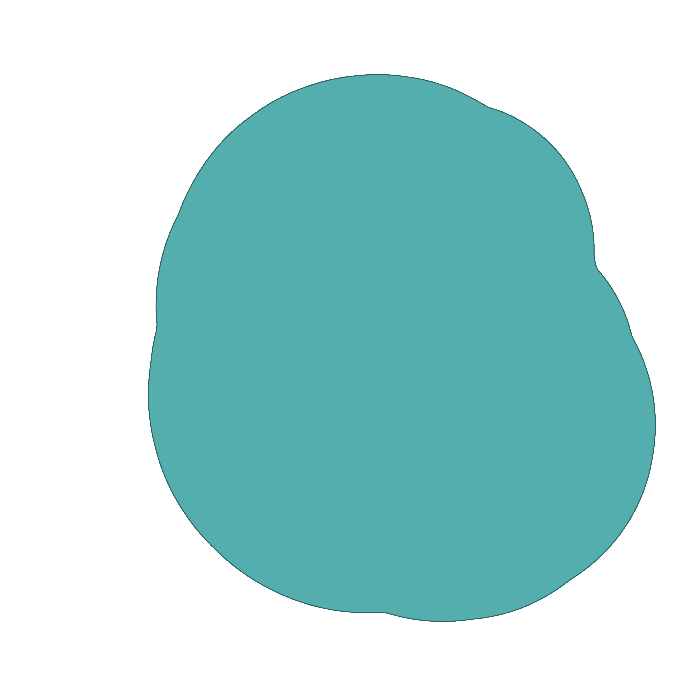

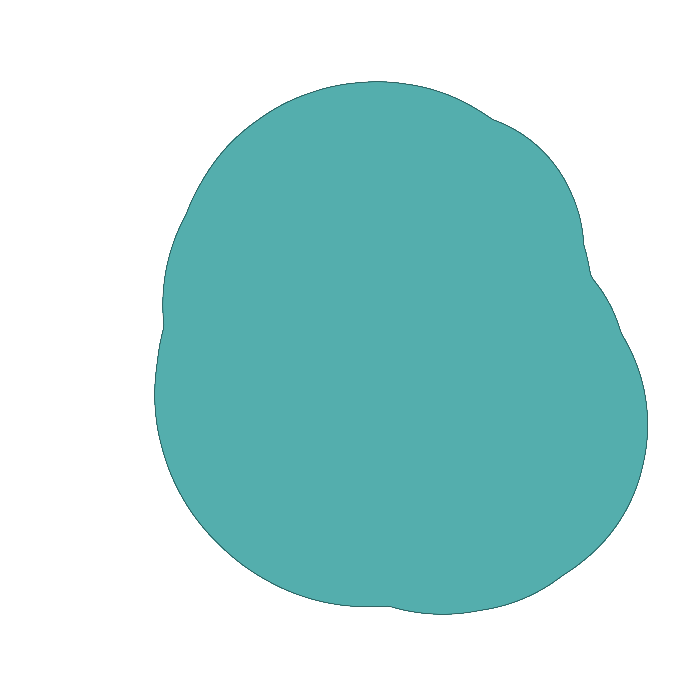

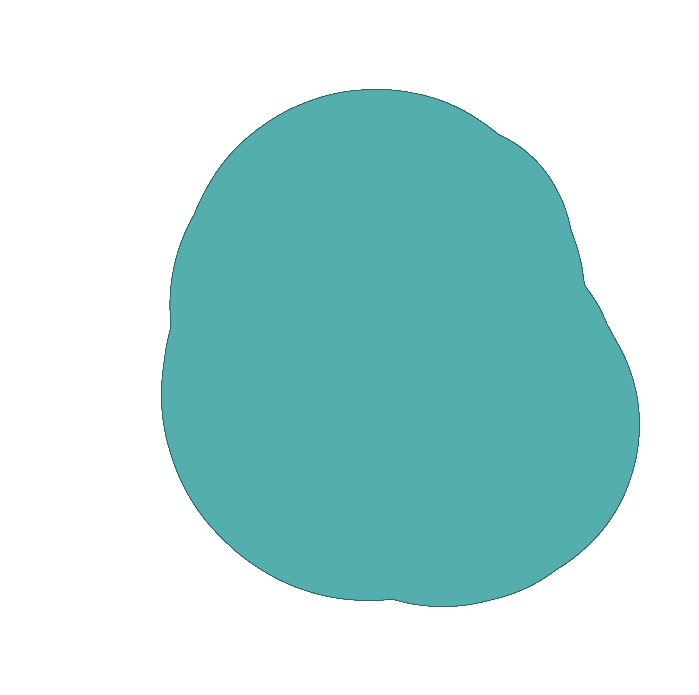

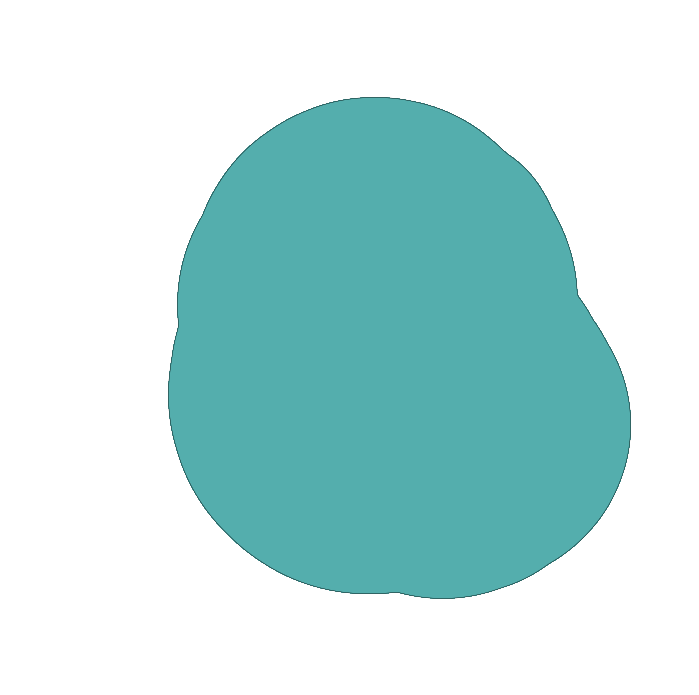

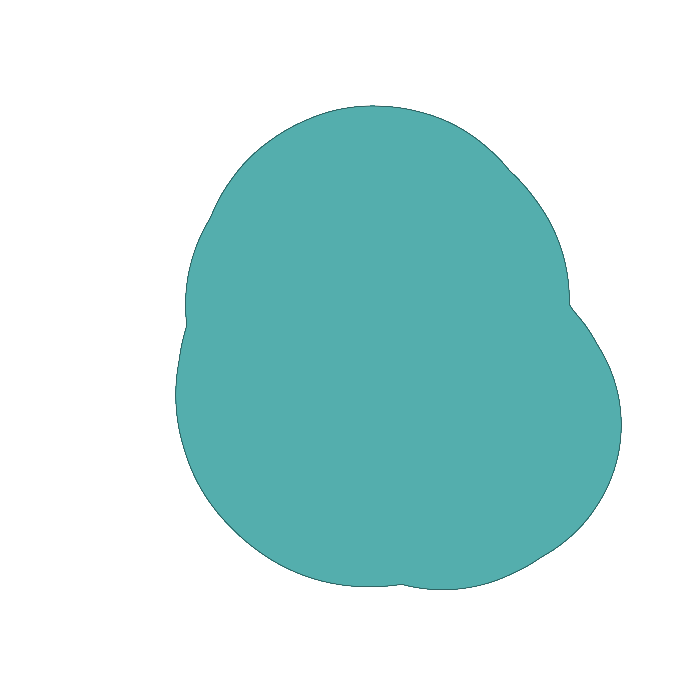

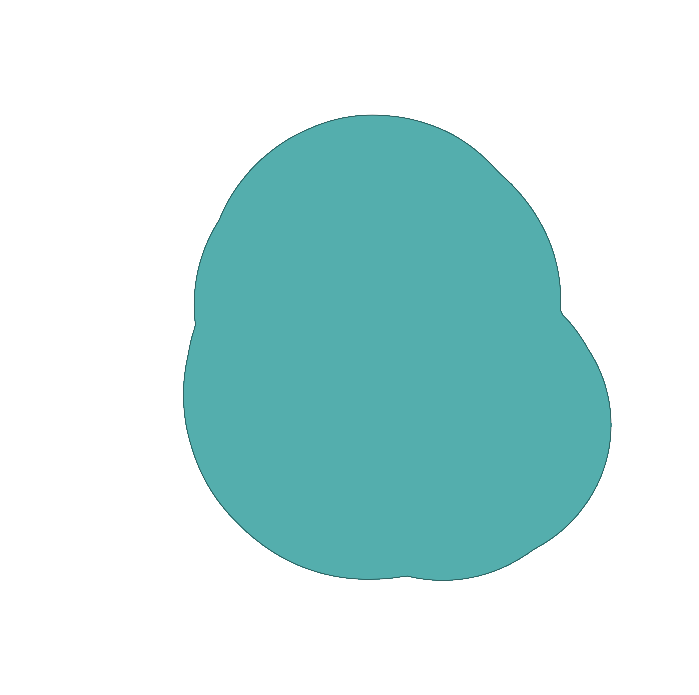

In [26]:
# draw image
for i in range(size):
  array_2d = sdf[:, :, i]

  num_levels = 6
  fig, ax = plt.subplots(figsize=(2.75, 2.75), dpi=300)
  levels_pos = np.logspace(-2, 0, num=num_levels)  # logspace
  levels_neg = -1. * levels_pos[::-1]
  levels = np.concatenate((levels_neg, np.zeros((0)), levels_pos), axis=0)
  colors = plt.get_cmap("Spectral")(np.linspace(0., 1., num=num_levels*2+1))

  sample = array_2d
  # sample = np.flipud(array_2d)
  CS = ax.contourf(sample, levels=levels, colors=colors)

  ax.contour(sample, levels=levels, colors='k', linewidths=0.1)
  ax.contour(sample, levels=[0], colors='k', linewidths=0.3)
  ax.axis('off')

  plt.savefig(os.path.join('./frames', '%03d.png' % i))

In [ ]:
# draw image
for i in range(64):
  array_2d = sdf[-64:, -64:, -i]

  num_levels = 6
  fig, ax = plt.subplots(figsize=(2.75, 2.75), dpi=300)
  levels_pos = np.logspace(-2, 0, num=num_levels)  # logspace
  levels_neg = -1. * levels_pos[::-1]
  levels = np.concatenate((levels_neg, np.zeros((0)), levels_pos), axis=0)
  colors = plt.get_cmap("Spectral")(np.linspace(0., 1., num=num_levels*2+1))

  sample = array_2d
  # sample = np.flipud(array_2d)
  CS = ax.contourf(sample, levels=levels, colors=colors)

  ax.contour(sample, levels=levels, colors='k', linewidths=0.1)
  ax.contour(sample, levels=[0], colors='k', linewidths=0.3)
  ax.axis('off')

  plt.savefig(os.path.join('./frames', '%03d.png' % i))

In [21]:
x=sdf[-64:,-64:,-64:]
type(x)

numpy.ndarray